In [ ]:
#Name: Nhi Tran
#ID number: 025463995
#CECS 456-Final Project

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315    

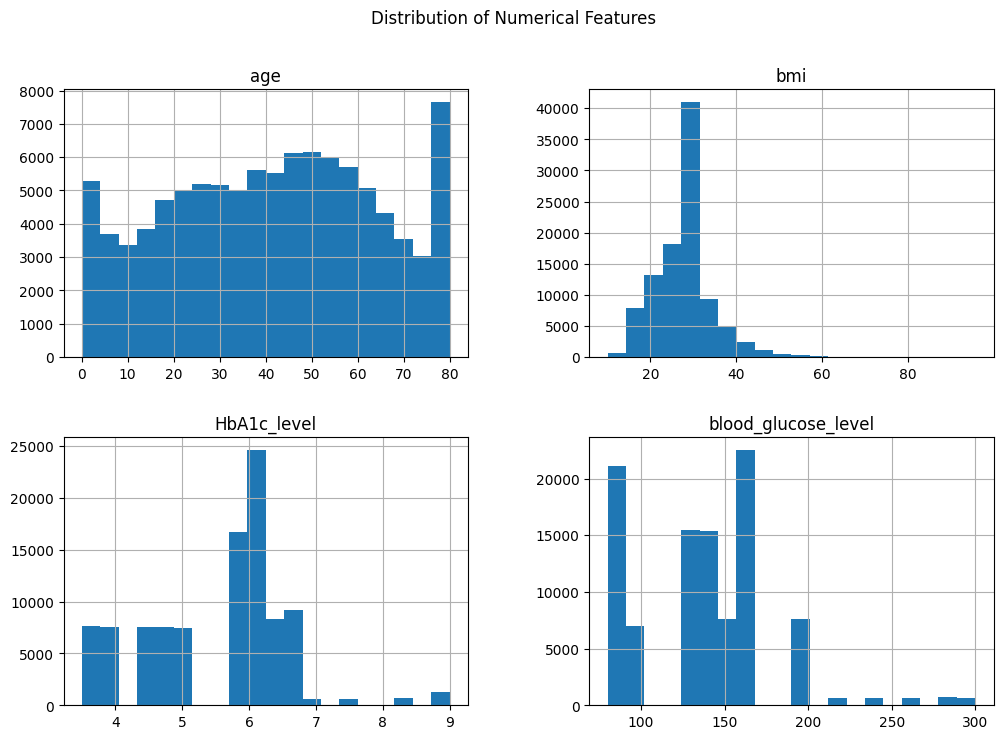

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


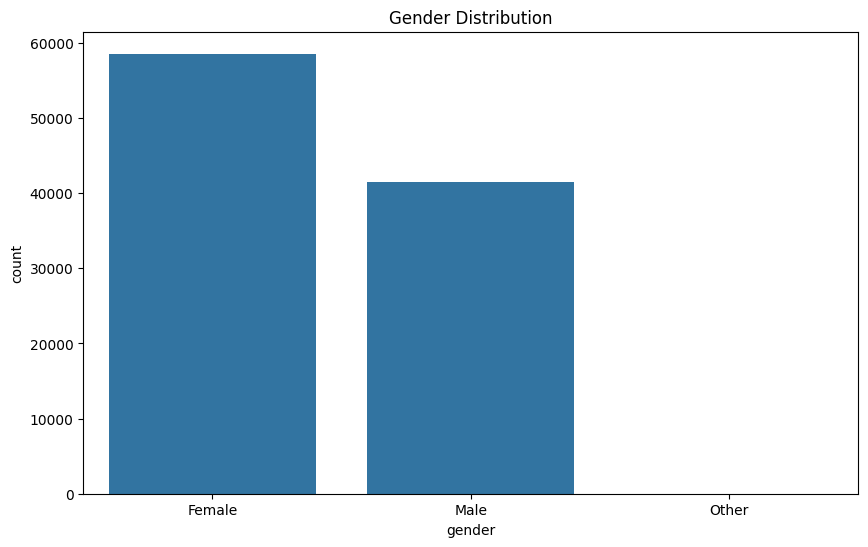

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


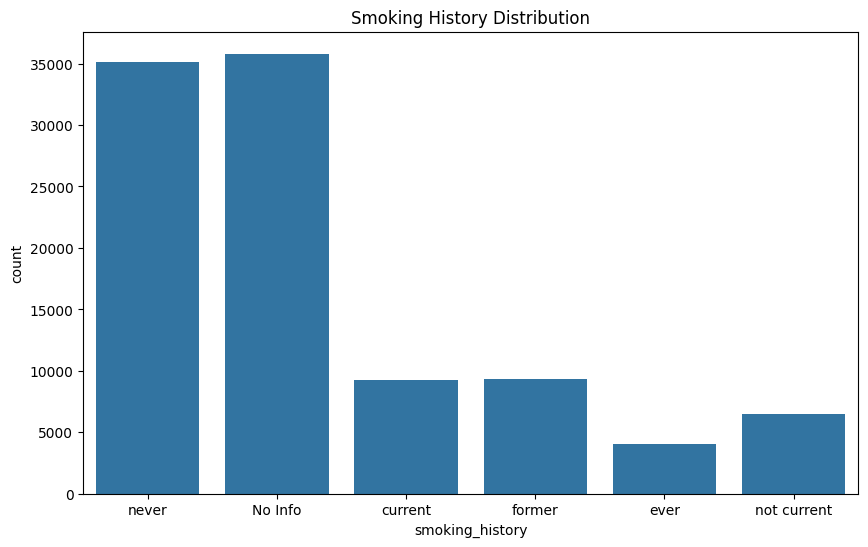

Diabete Distribution:
diabetes
0    91500
1     8500
Name: count, dtype: int64


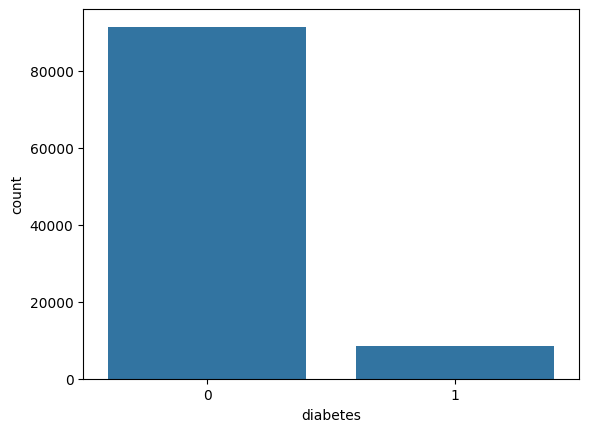

In [ ]:
#1.1: Exploratory data analysis (EDA)
#Load the Diabetes data
data = pd.read_csv('diabetes_prediction_dataset.csv')

#dataset features:
#Categorical features: gender, smoking
#Num erical: age, bmi, HbA1c_level, blood_glucose_level
#Binary: hypertension, heart_disease
#Target: diabetes

#Target: diabetes: 0 for Non-diabetes, 1 for Diabetes

#Basic information of the dataset
print('Dataset information:')
print(data.info()) #data type and non-null count
print(data.describe()) #mean, standard deviation, min, max
print('Missing values')
print(data.isnull().sum())
#print(data.head())

# Visualize the distribution of numerical features
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
data[numerical_features].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Visualize the distribution of categorical variables
print(data['gender'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='gender')
plt.title('Gender Distribution')
plt.show()

print(data['smoking_history'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='smoking_history')
plt.title('Smoking History Distribution')
plt.show()

#count the distribution of the targe variable
print('Diabete Distribution:')
print(data['diabetes'].value_counts())
#countplot of distribution of the target variable
sns.countplot(x='diabetes', data=data)
plt.show()



Dataset distribution after handling and converting categorical features:


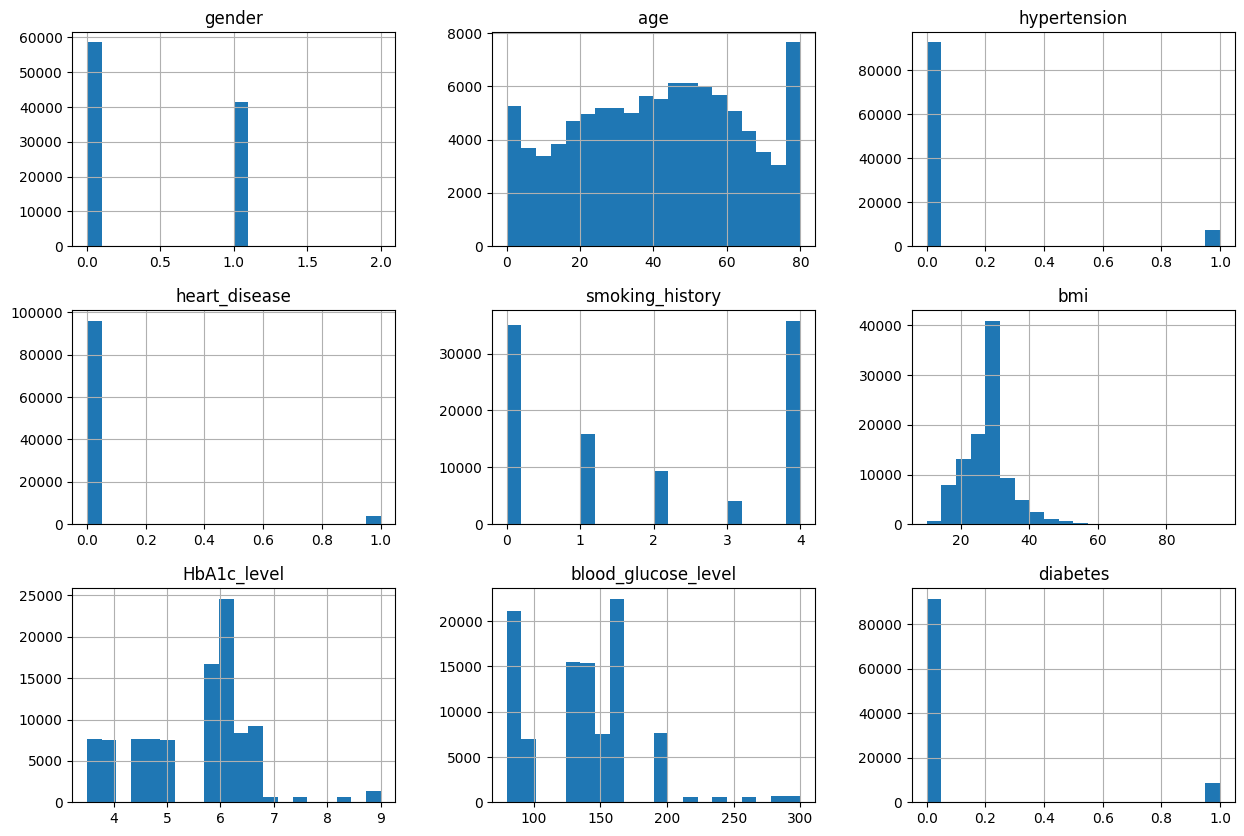

gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


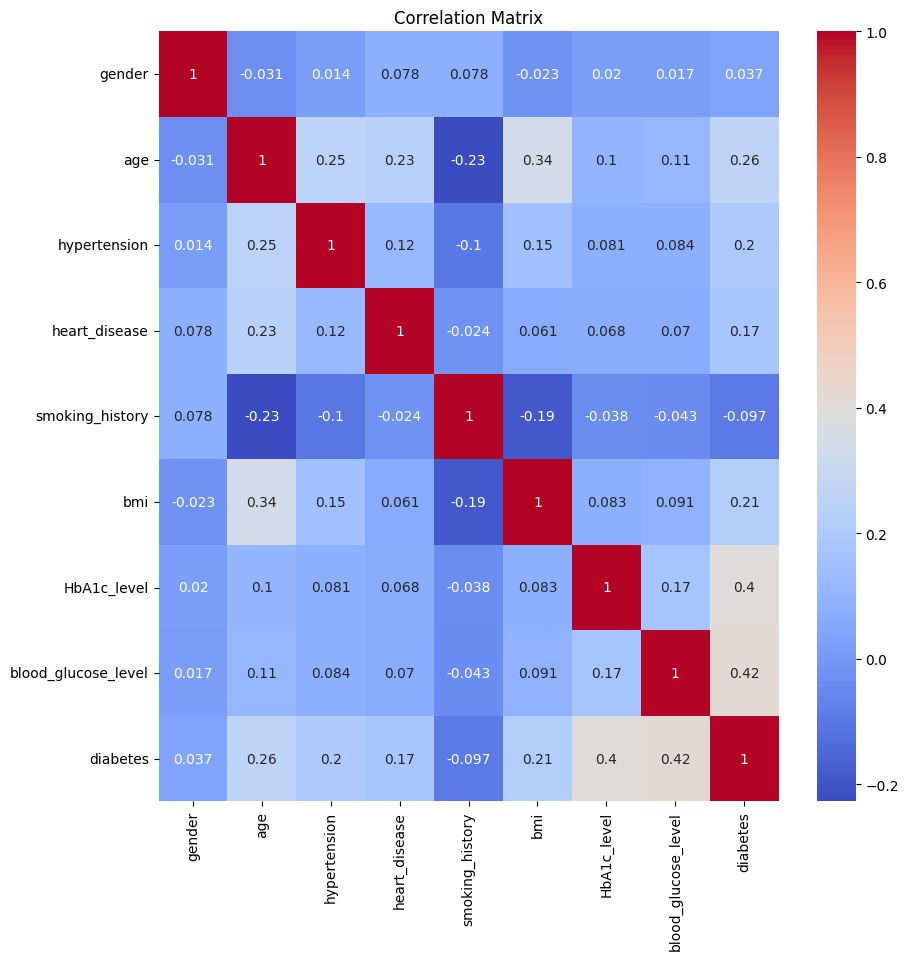

In [ ]:
#convert categorical features to numeric
data['gender'] = LabelEncoder().fit_transform(data['gender'])
#convert smoking_history to numeric
data['smoking_history'] = data['smoking_history'].map({
    'never': 0,
    'former': 1, #smoke in the past, not currently => combine with 'not current' => avoid redundancy
    'current': 2,
    'not current': 1, #combine with 'former'
    'ever': 3, #'ever' could be overlap with 'current' or 'former'=>leave it separately
    'No Info': 4})

#histogram for numeric features and categorical features after convertion
print('Dataset distribution after handling and converting categorical features:')
data.hist(bins=20, figsize=(15,10))
plt.show()

#heatmap for correlation between features
print(data.dtypes) #check if there all numerical
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Outliers for numeric features:


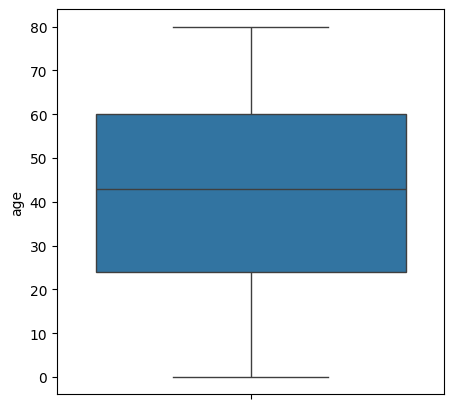

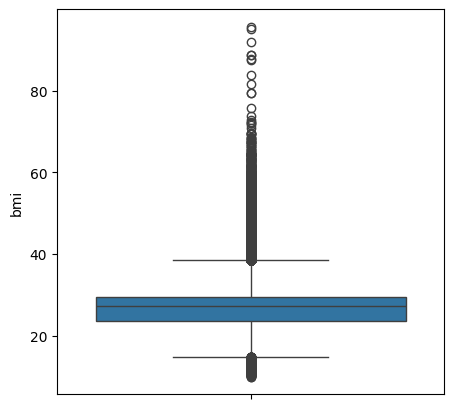

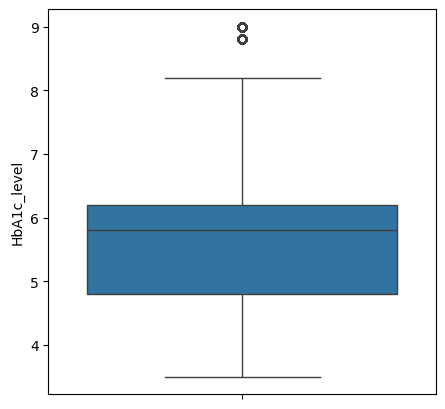

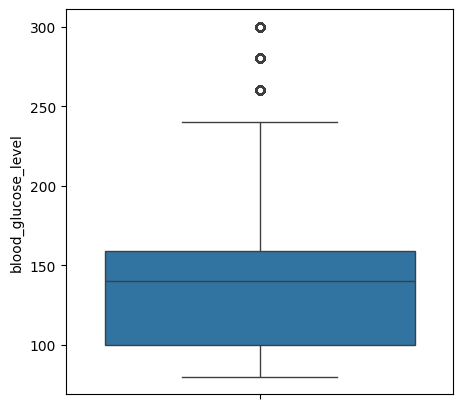

In [ ]:
#Outliers, and any inconststencies in the data
print('Outliers for numeric features:')
for col in ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']:
  plt.figure(figsize=(5,5))
  sns.boxplot(data[col])
  plt.show()

In [ ]:
#1.3: Encode categorical variables and normalize numerical features
#normailize numerical features
scaler = MinMaxScaler()
data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

#check for transformed dataser
print(data.head())

   gender       age  hypertension  heart_disease  smoking_history       bmi  \
0       0  1.000000             0              1                0  0.177171   
1       0  0.674675             0              0                4  0.202031   
2       1  0.349349             0              0                0  0.202031   
3       0  0.449449             0              0                2  0.156863   
4       1  0.949950             1              1                2  0.118231   

   HbA1c_level  blood_glucose_level  diabetes  
0     0.563636             0.272727         0  
1     0.563636             0.000000         0  
2     0.400000             0.354545         0  
3     0.272727             0.340909         0  
4     0.236364             0.340909         0  


In [ ]:
#1.4: Split dataset
X = data.drop('diabetes', axis=1)
y = data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#check traning and test set distribution
print("Training set class distribution:")
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

print("\nTesting set class distribution:")
print(y_test.value_counts())
print(y_test.value_counts(normalize=True))

Training set class distribution:
diabetes
0    73208
1     6792
Name: count, dtype: int64
diabetes
0    0.9151
1    0.0849
Name: proportion, dtype: float64

Testing set class distribution:
diabetes
0    18292
1     1708
Name: count, dtype: int64
diabetes
0    0.9146
1    0.0854
Name: proportion, dtype: float64


In [ ]:
#1: Model Design and Training
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import f1_score



Decision Tree Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.73      0.74      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.85      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000

Confusion Matrix: 
[[17813   479]
 [  442  1266]]
ROC-AUC Score:  0.857595778423503


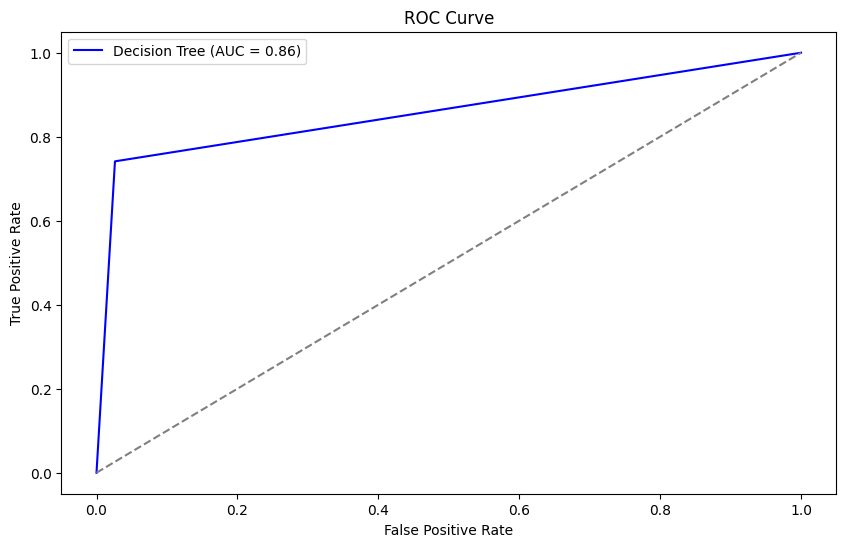

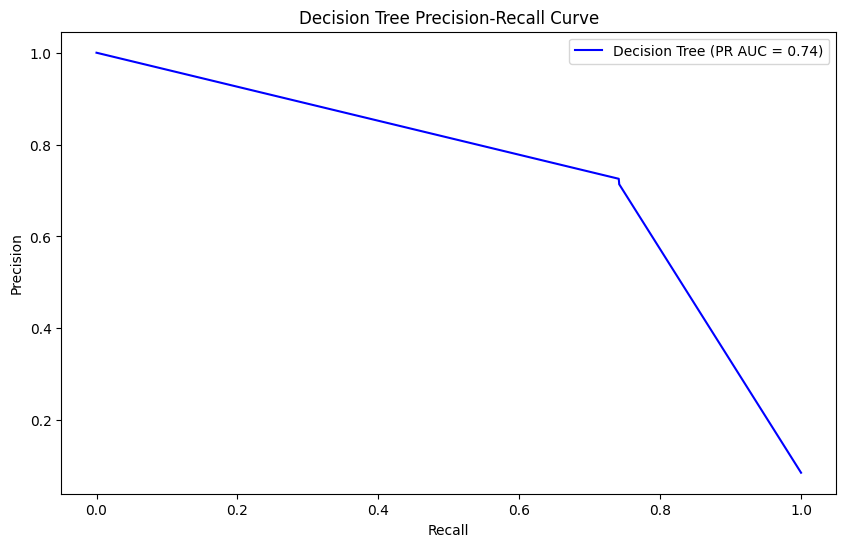

<Figure size 1000x600 with 0 Axes>

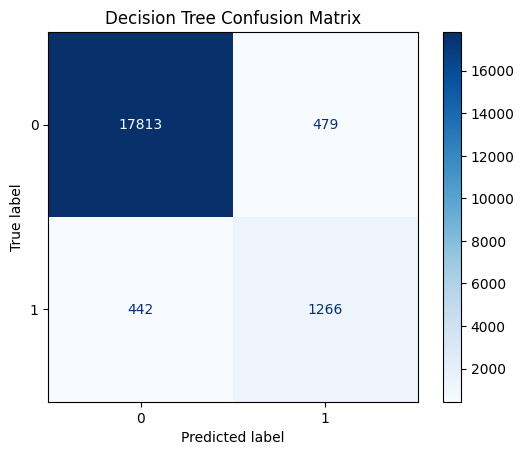

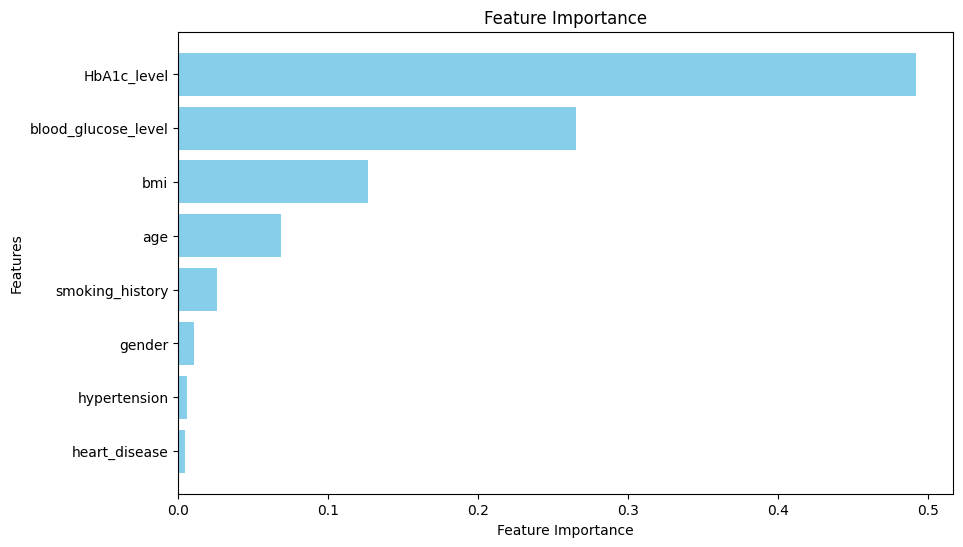

In [ ]:
#1.1.1: DecisionTree
#Train the Decision Tree Classifier
dt_orig = DecisionTreeClassifier(random_state = 42)
dt_orig.fit(X_train, y_train)
#Predict
dt_orig_y_pred = dt_orig.predict(X_test)

#Evaluation
##Classification report
print("Decision Tree Classification report: ")
print(classification_report(y_test, dt_orig_y_pred))

##Confusion Matrix
dt_orig_conf_matrix = confusion_matrix(y_test, dt_orig_y_pred)
print("Confusion Matrix: ")
print(dt_orig_conf_matrix)

##ROC-AUC score
y_pred_proba_original = dt_orig.predict_proba(X_test)[:, 1]
dt_orig_roc_auc = roc_auc_score(y_test, y_pred_proba_original)
print("ROC-AUC Score: ", dt_orig_roc_auc)

# Visualize the tree
#plt.figure(figsize=(15, 10))
#plot_tree(dt, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
#plt.show()

# Cross-validation
#scores = cross_val_score(dt_orig, X, y, cv=5, scoring='dt_orig_roc_auc')
#print("Cross-validated ROC-AUC scores:", scores)
#print("Mean ROC-AUC score:", scores.mean())


# ROC Curves for Original
plt.figure(figsize=(10, 6))
dt_orig_fpr, dt_orig_tpr, _ = roc_curve(y_test, y_pred_proba_original)
dt_orig_roc_auc = auc(dt_orig_fpr, dt_orig_tpr)
plt.plot(dt_orig_fpr, dt_orig_tpr, label=f'Decision Tree (AUC = {dt_orig_roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

# Precision-Recall Curves
plt.figure(figsize=(10, 6))
dt_orig_precision, dt_orig_recall, _ = precision_recall_curve(y_test, y_pred_proba_original)
dt_orig_pr_auc = auc(dt_orig_recall, dt_orig_precision)
plt.plot(dt_orig_recall, dt_orig_precision, label=f'Decision Tree (PR AUC = {dt_orig_pr_auc:.2f})', color='blue')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Decision Tree Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

# Confusion Matrix Heatmaps
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, dt_orig.predict(X_test), cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()


# Get feature importance from improved model
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_orig.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best ROC-AUC Score: 0.8016498764364803
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

Confusion Matrix: 
[[18281    11]
 [  543  1165]]


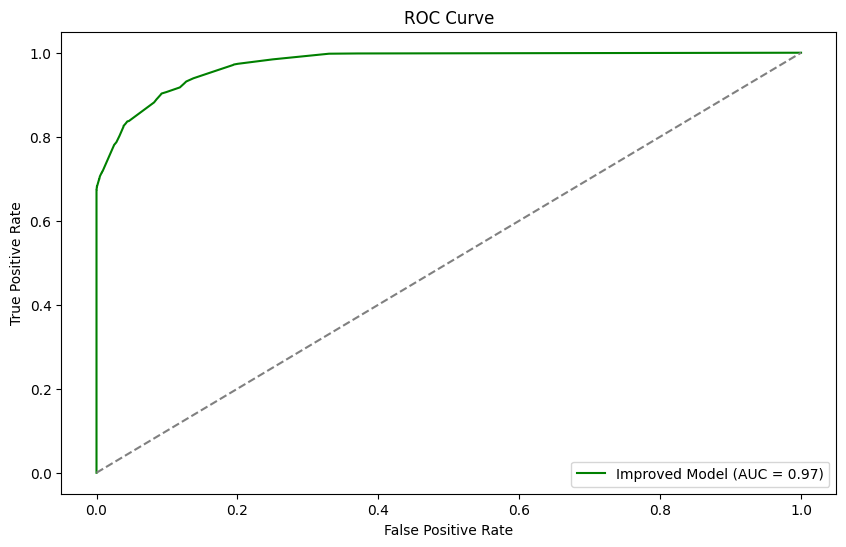

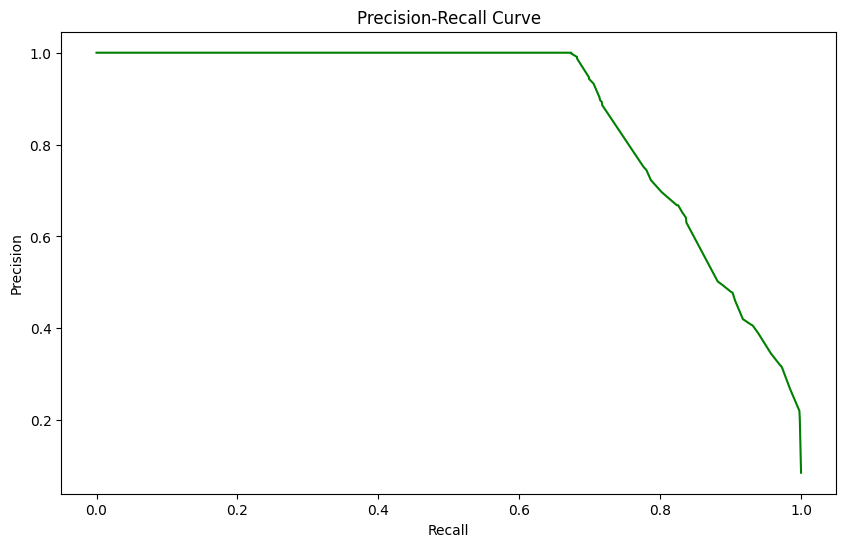

<Figure size 1000x600 with 0 Axes>

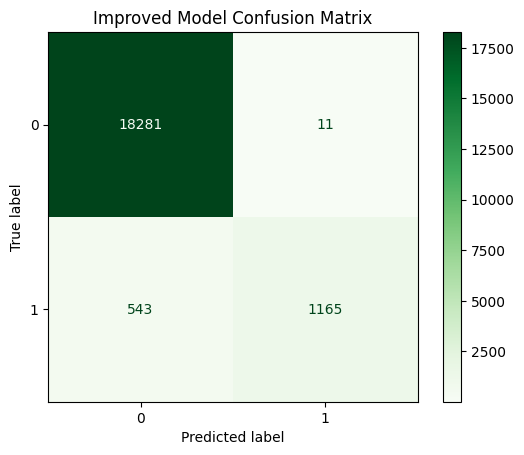

In [ ]:
#2.1: Hyperparameter Tuning for Decision Tree
#Fine-tuning hyperparameters (max_depth min_samples_split, min_sample_leaf, cirterion) help reduce overfitting and improve the model's ability to generalize.
#A full-depth Decision Tree may be overfitting the training data.

dthyp_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

scoring = make_scorer(f1_score, average='binary', pos_label=1)
dthyp_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=dthyp_param_grid, scoring=scoring, cv=5, n_jobs=-1)
dthyp_grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", dthyp_grid_search.best_params_)
print("Best ROC-AUC Score:", dthyp_grid_search.best_score_)

# Train and evaluate with the best estimator
dt_besthyp = dthyp_grid_search.best_estimator_
dt_y_pred_besthyp = dt_besthyp.predict(X_test)
print(classification_report(y_test, dt_y_pred_besthyp))

##Confusion Matrix
conf_matrix = confusion_matrix(y_test, dt_y_pred_besthyp)
print("Confusion Matrix: ")
print(conf_matrix)

# ROC Curves Improved Model
plt.figure(figsize=(10, 6))
dt_hyp_y_pred_proba = dt_besthyp.predict_proba(X_test)[:, 1]
dthyp_fpr, dthyp_tpr, _ = roc_curve(y_test, dt_hyp_y_pred_proba)
dthyp_roc_auc = auc(dthyp_fpr, dthyp_tpr)
plt.plot(dthyp_fpr, dthyp_tpr, label=f'Improved Model (AUC = {dthyp_roc_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

# Precision-Recall Curves
plt.figure(figsize=(10, 6))
dthyp_precision, dthyp_recall, _ = precision_recall_curve(y_test, dt_hyp_y_pred_proba)
dthyp_pr_auc = auc(dthyp_recall, dthyp_precision)
plt.plot(dthyp_recall, dthyp_precision, label=f'Improved Model (PR AUC = {dthyp_pr_auc:.2f})', color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# Confusion Matrix Heatmaps
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, dt_besthyp.predict(X_test), cmap='Greens')
plt.title("Improved Model Confusion Matrix")
plt.show()


In [ ]:
#Feature Selection Using Mutual Information for Decision Tree
#Mutual Information measures the dependency between each feature and the target variable.
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Mutual Information Feature Selection
for k in range(1, 8):
  dtfs_selector = SelectKBest(score_func=mutual_info_classif, k=k)
  dtfs_X_train_selected = dtfs_selector.fit_transform(X_train, y_train)
  dtfs_X_test_selected = dtfs_selector.transform(X_test)

  # Get selected feature names
  selected_features = X_train.columns[dtfs_selector.get_support()]
  print("Selected Features:", selected_features)

  # Train Decision Tree on Selected Features
  dtfs = DecisionTreeClassifier(random_state=42)
  dtfs.fit(dtfs_X_train_selected, y_train)

  # Evaluate Model
  y_pred = dtfs.predict(dtfs_X_test_selected)
  print("Classification Report:")
  print(classification_report(y_test, y_pred))

Selected Features: Index(['HbA1c_level'], dtype='object')
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     18292
           1       1.00      0.46      0.63      1708

    accuracy                           0.95     20000
   macro avg       0.98      0.73      0.80     20000
weighted avg       0.96      0.95      0.95     20000

Selected Features: Index(['HbA1c_level', 'blood_glucose_level'], dtype='object')
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

Selected Features: Index(['age', 'HbA1c_level', 'blood_glucose_level'], dtype='object')
Classification Report:
              precision    recall  f1-score   supp

Selected Features: Index(['HbA1c_level', 'blood_glucose_level'], dtype='object')
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

Confusion Matrix: 
[[18292     0]
 [  557  1151]]


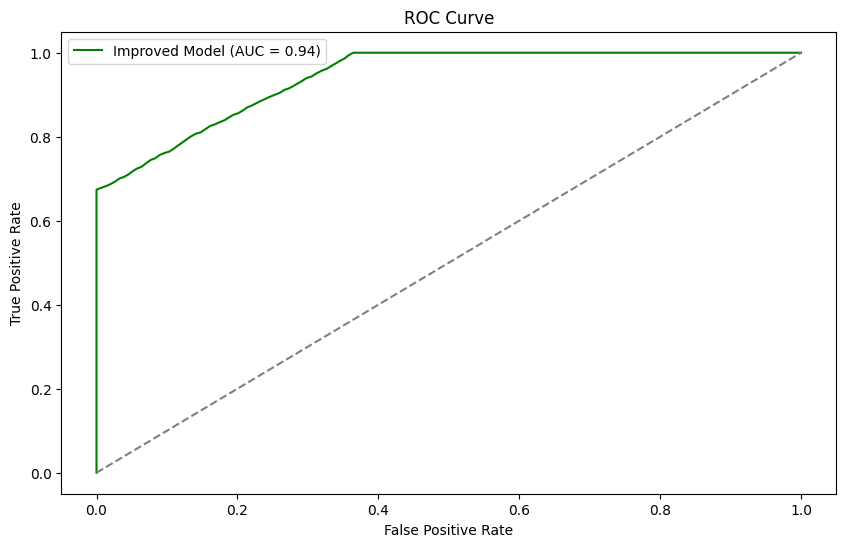

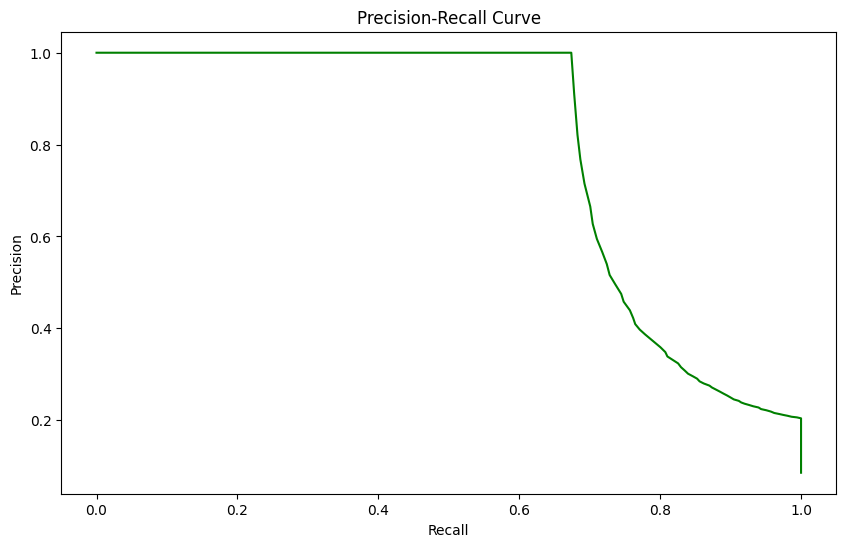

<Figure size 1000x600 with 0 Axes>

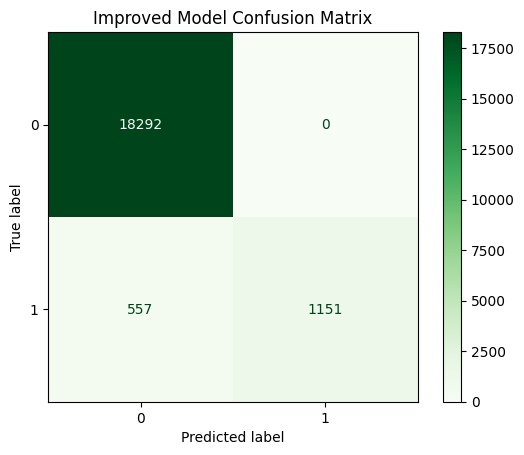

In [ ]:
#Feature Selection Using Mutual Information for Decision Tree
#Mutual Information measures the dependency between each feature and the target variable.
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Mutual Information Feature Selection
k = 2  # Number of top features to select
dtfs_selector = SelectKBest(score_func=mutual_info_classif, k=k)
dtfs_X_train_selected = dtfs_selector.fit_transform(X_train, y_train)
dtfs_X_test_selected = dtfs_selector.transform(X_test)

# Get selected feature names
selected_features = X_train.columns[dtfs_selector.get_support()]
print("Selected Features:", selected_features)

# Train Decision Tree on Selected Features
dtfs = DecisionTreeClassifier(random_state=42)
dtfs.fit(dtfs_X_train_selected, y_train)

# Evaluate Model
dtfs_y_pred = dtfs.predict(dtfs_X_test_selected)
print("Classification Report:")
print(classification_report(y_test, dtfs_y_pred))

##Confusion Matrix
dtfs_conf_matrix = confusion_matrix(y_test, dtfs_y_pred)
print("Confusion Matrix: ")
print(dtfs_conf_matrix)

# ROC Curves Improved Model
plt.figure(figsize=(10, 6))
dtfs_y_pred_proba = dtfs.predict_proba(dtfs_X_test_selected)[:, 1]
dtfs_fpr, dtfs_tpr, _ = roc_curve(y_test, dtfs_y_pred_proba)
dtfs_roc_auc = auc(dtfs_fpr, dtfs_tpr)
plt.plot(dtfs_fpr, dtfs_tpr, label=f'Improved Model (AUC = {dtfs_roc_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

# Precision-Recall Curves
plt.figure(figsize=(10, 6))
dtfs_precision, dtfs_recall, _ = precision_recall_curve(y_test, dtfs_y_pred_proba)
dtfs_pr_auc = auc(dtfs_recall, dtfs_precision)
plt.plot(dtfs_recall, dtfs_precision, label=f'Improved Model (PR AUC = {dtfs_pr_auc:.2f})', color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# Confusion Matrix Heatmaps
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, dtfs_y_pred, cmap='Greens')
plt.title("Improved Model Confusion Matrix")
plt.show()



Multi-layer Perception (MLP): 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

Confusion Matrix: 
[[18281    11]
 [  545  1163]]
ROC-AUC Score:  0.9775214469052903


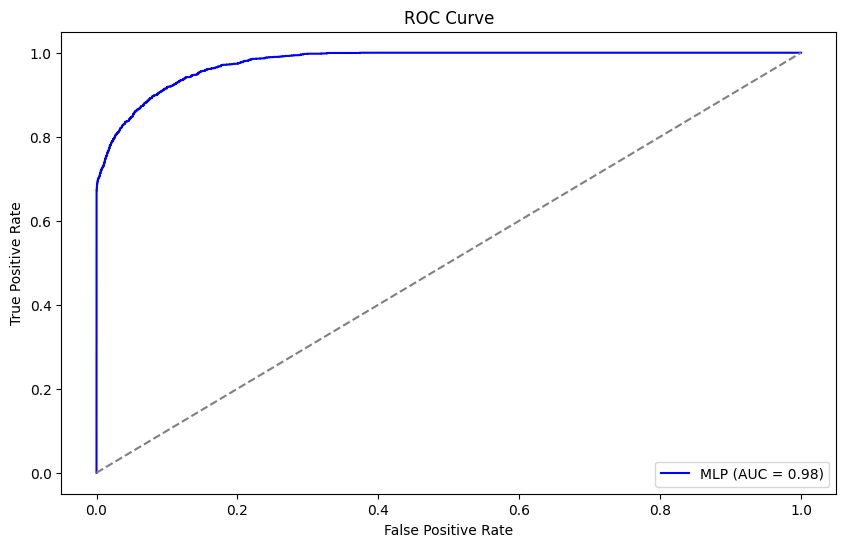

Precision-Recall: 0.8832136480313213


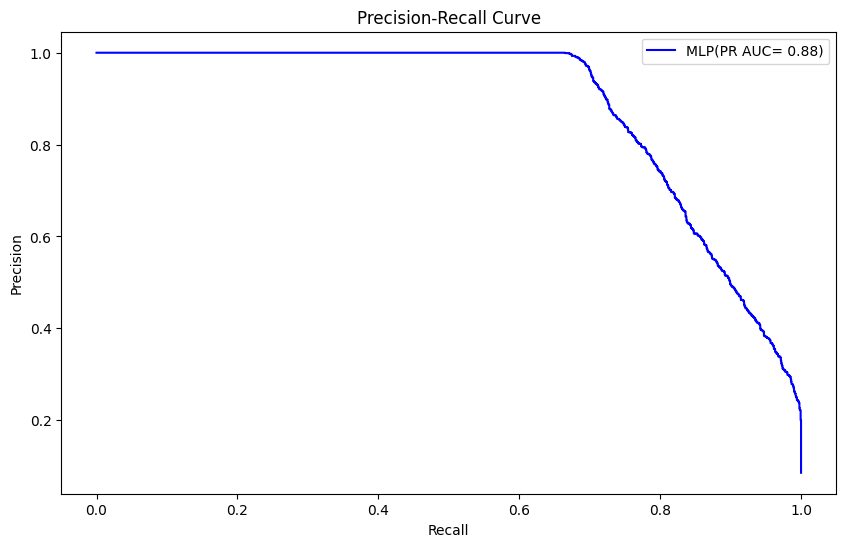

<Figure size 1000x600 with 0 Axes>

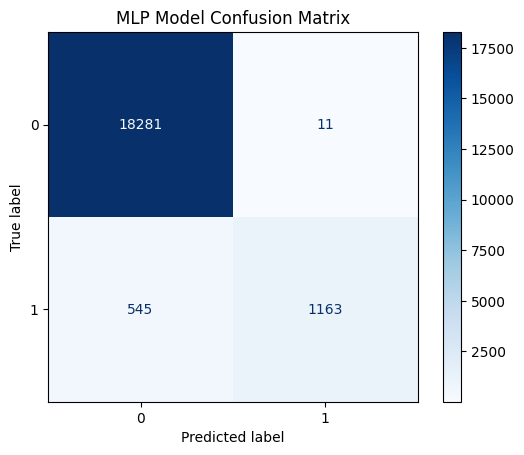

In [ ]:
#1.1.3: Multi-layer Perception (MLP)
#Train the MLP model
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42)
mlp_model.fit(X_train, y_train)

#Predict and evaluate
mlp_orig_y_pred = mlp_model.predict(X_test)
print("Multi-layer Perception (MLP): ")
print(classification_report(y_test, mlp_orig_y_pred))

##Confusion Matrix
mlp_orig_conf_matrix = confusion_matrix(y_test, mlp_orig_y_pred)
print("Confusion Matrix: ")
print(mlp_orig_conf_matrix)

# Cross-validation
#scores = cross_val_score(mlp_model, X, y, cv=5, scoring='roc_auc')
#print("Cross-validated ROC-AUC scores:", scores)
#print("Mean ROC-AUC score:", scores.mean())

##ROC-AUC score
mlp_orig_y_pred_proba = mlp_model.predict_proba(X_test)[:, 1]
mlp_orig_fpr, mlp_orig_tpr, _ = roc_curve(y_test, mlp_orig_y_pred_proba)
mlp_orig_roc_auc = roc_auc_score(y_test, mlp_orig_y_pred_proba)
print("ROC-AUC Score: ", mlp_orig_roc_auc)
plt.figure(figsize=(10, 6))
plt.plot(mlp_orig_fpr, mlp_orig_tpr, label=f'MLP (AUC = {mlp_orig_roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

# Compute precision-recall curve
mlp_orig_precision, mlp_orig_recall, _ = precision_recall_curve(y_test, mlp_orig_y_pred_proba)
mlp_orig_pr_auc = auc(mlp_orig_recall, mlp_orig_precision)
print("Precision-Recall:", mlp_orig_pr_auc)
# Plot precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(mlp_orig_recall, mlp_orig_precision, label=f'MLP(PR AUC={mlp_orig_pr_auc: .2f})', color='blue')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()


# Confusion Matrix Heatmaps
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, mlp_orig_y_pred, cmap='Blues')
plt.title("MLP Model Confusion Matrix")
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multi-layer Perception (MLP): 
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     18292
           1       0.51      0.90      0.65      1708

    accuracy                           0.92     20000
   macro avg       0.75      0.91      0.80     20000
weighted avg       0.95      0.92      0.93     20000

Confusion Matrix: 
[[16809  1483]
 [  177  1531]]
ROC-AUC Score:  0.9750963071864128


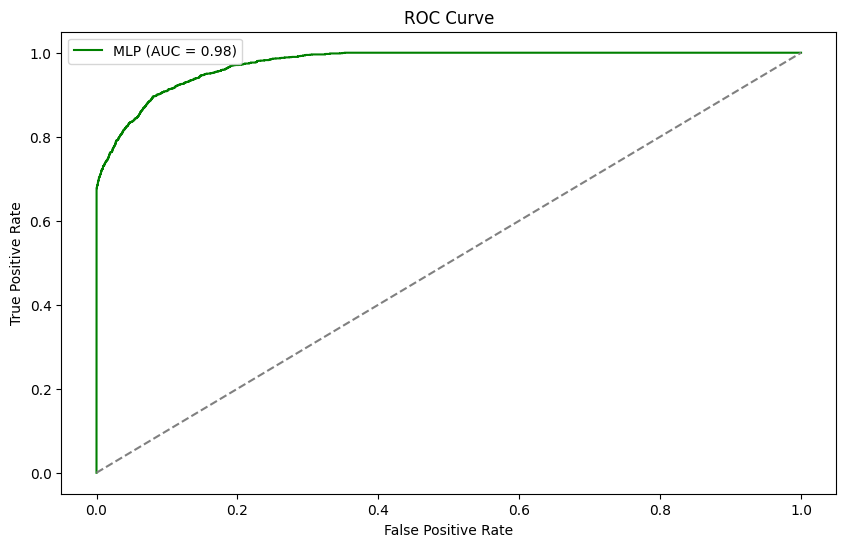

Precision-Recall AUC: 0.875349737587396


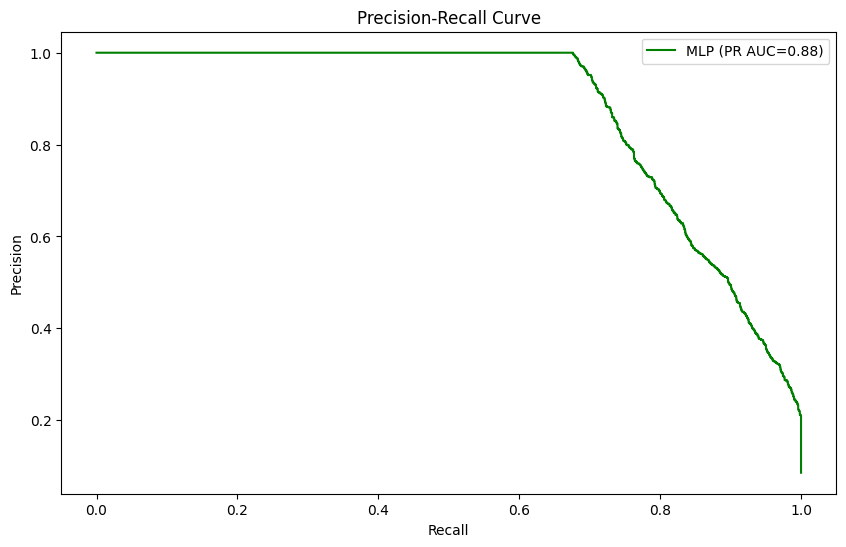

<Figure size 1000x600 with 0 Axes>

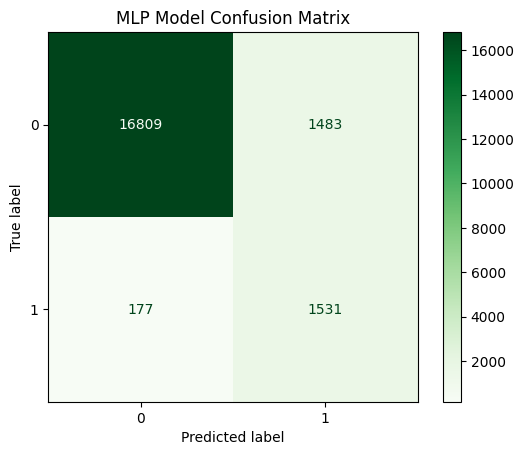

In [ ]:
#aaply Oversampling SMOTE for MLP
# Apply SMOTE for oversampling the minority class
mlp_smote = SMOTE(random_state=42)

# Resample the training data (X_train, y_train) using SMOTE
mlp_X_train_resampled, mlp_y_train_resampled = mlp_smote.fit_resample(X_train, y_train)

# Train the MLP model on the resampled data
mlpos = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42)
mlpos.fit(mlp_X_train_resampled, mlp_y_train_resampled)

# Predict using the resampled model
mlpos_y_pred = mlpos.predict(X_test)

# Print classification report
print("Multi-layer Perception (MLP): ")
print(classification_report(y_test, mlpos_y_pred))

# Confusion Matrix
mlpos_conf_matrix = confusion_matrix(y_test, mlpos_y_pred)
print("Confusion Matrix: ")
print(mlpos_conf_matrix)

# ROC-AUC score
mlpos_y_pred_proba = mlpos.predict_proba(X_test)[:, 1]
mlpos_fpr, mlpos__tpr, _ = roc_curve(y_test, mlpos_y_pred_proba)
mlpos_roc_auc = roc_auc_score(y_test, mlpos_y_pred_proba)
print("ROC-AUC Score: ", mlpos_roc_auc)

# ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(mlpos_fpr, mlpos__tpr, label=f'MLP (AUC = {mlpos_roc_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

# Compute Precision-Recall Curve
mlpos_precision, mlpos_recall, _ = precision_recall_curve(y_test, mlpos_y_pred_proba)
mlpos_pr_auc = auc(mlpos_recall, mlpos_precision)
print("Precision-Recall AUC:", mlpos_pr_auc)

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(mlpos_recall, mlpos_precision, label=f'MLP (PR AUC={mlpos_pr_auc:.2f})', color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, mlpos_y_pred, cmap='Greens')
plt.title("MLP Model Confusion Matrix")
plt.show()


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (64,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'adam'}
Best ROC-AUC Score: 0.8005384957522672

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.99      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000


Confusion Matrix:
[[18284     8]
 [  551  1157]]


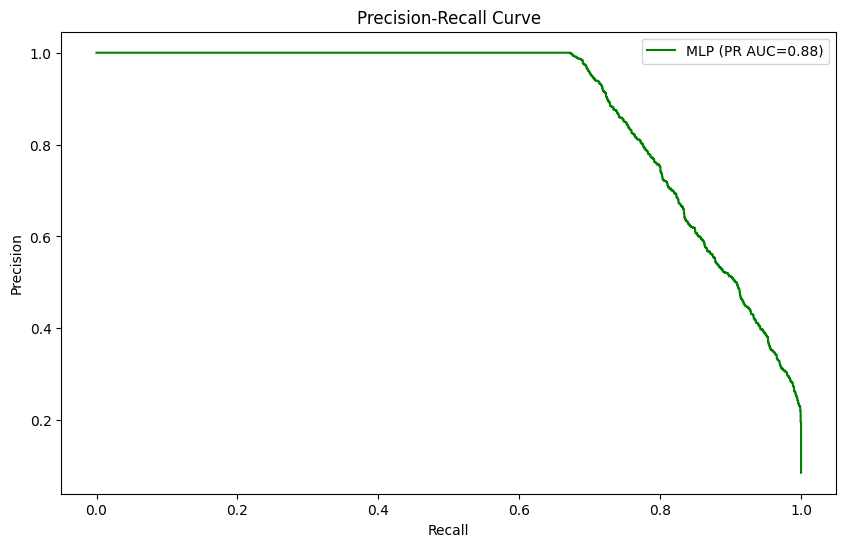

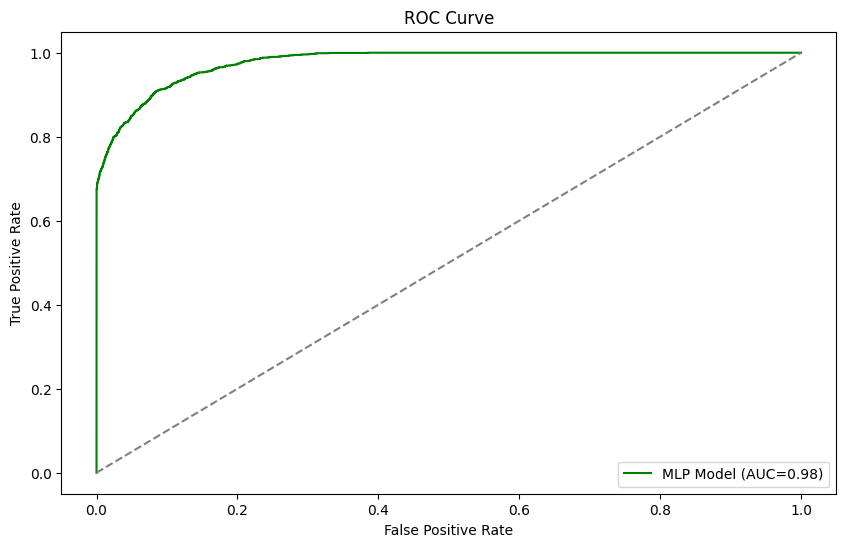

<Figure size 1000x600 with 0 Axes>

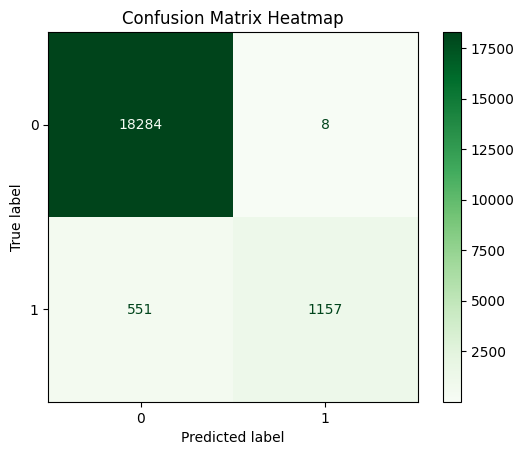

In [ ]:
#Hyperparameter for MLP

mlp_param_grid = {
    'hidden_layer_sizes': [(64,), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [200],
}

# Initialize the MLPClassifier with early stopping enabled
mlphyp = MLPClassifier(
    random_state=42,
    early_stopping=True,  # Enable early stopping
    validation_fraction=0.1,  # Use 10% of training data for validation
    n_iter_no_change=10  # Stop training if no improvement for 10 iterations
)

# GridSearchCV for hyperparameter tuning
scoring = make_scorer(f1_score, average='binary', pos_label=1)
mlphyp_grid_search = GridSearchCV(estimator=mlphyp, param_grid=mlp_param_grid, cv=5, scoring= scoring, n_jobs=-1, verbose=1)
mlphyp_grid_search.fit(X_train, y_train)

# Get the best estimator
mlphyp_best = mlphyp_grid_search.best_estimator_

# Print best parameters and best score
print("Best Parameters:", mlphyp_grid_search.best_params_)
print("Best ROC-AUC Score:", mlphyp_grid_search.best_score_)

# Evaluate the model on the test set
mlphyp_y_pred = mlphyp_best.predict(X_test)
mlphyp_y_pred_proba = mlphyp_best.predict_proba(X_test)[:, 1]

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, mlphyp_y_pred))

# Confusion Matrix
mlphyp_conf_matrix = confusion_matrix(y_test, mlphyp_y_pred)
print("\nConfusion Matrix:")
print(mlphyp_conf_matrix)

## Precision-Recall Curve
mlphyp_precision, mlphyp_recall, _ = precision_recall_curve(y_test, mlphyp_y_pred_proba)
mlphyp_pr_auc = auc(mlphyp_recall, mlphyp_precision)
plt.figure(figsize=(10, 6))
plt.plot(mlphyp_recall, mlphyp_precision, label=f'MLP (PR AUC={mlphyp_pr_auc:.2f})', color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

# ROC-AUC Score
mlphyp_fpr, mlphyp_tpr, _ = roc_curve(y_test, mlphyp_y_pred_proba)
mlphyp_roc_auc = roc_auc_score(y_test, mlphyp_y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(mlphyp_fpr, mlphyp_tpr, label=f'MLP Model (AUC={mlphyp_roc_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, mlphyp_y_pred, cmap='Greens')
plt.title("Confusion Matrix Heatmap")
plt.show()

Logistic Regression: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.87      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000

Confusion Matrix: 
[[18138   154]
 [  663  1045]]
ROC-AUC Score:  0.9613989152550533


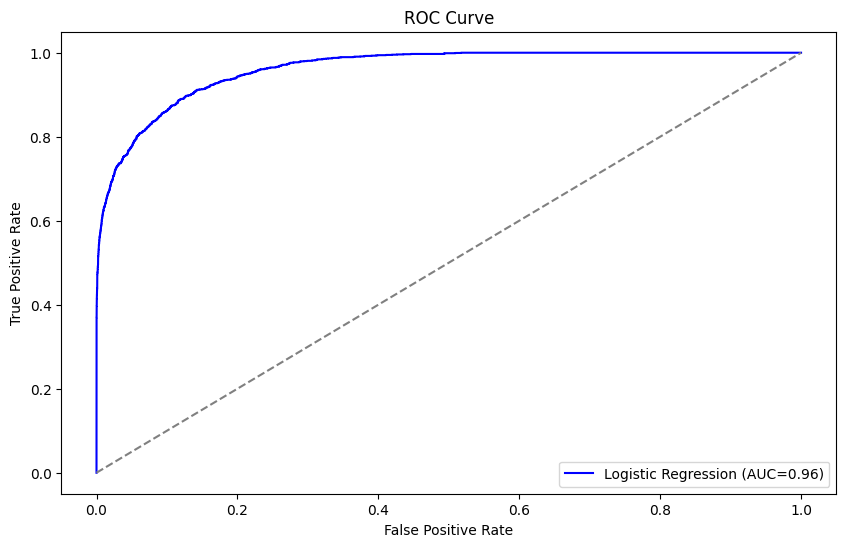


Precision-Recall AUC Score: 0.81


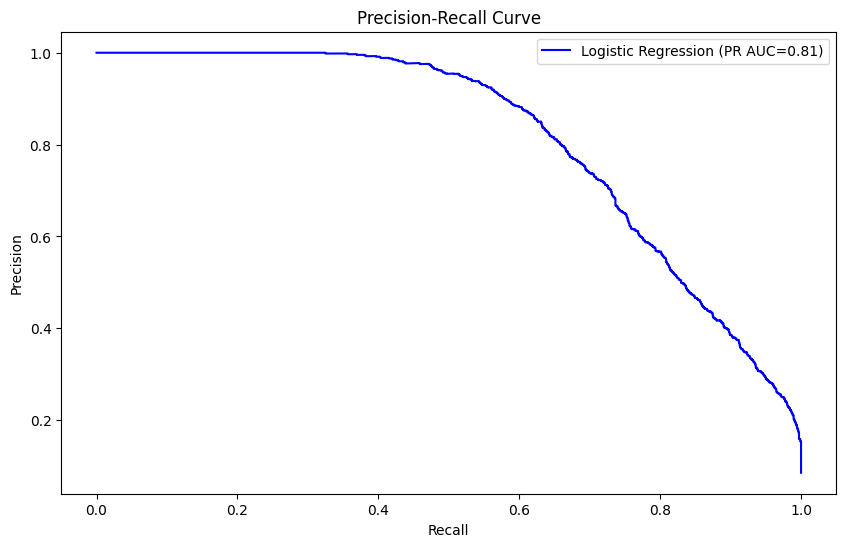

<Figure size 1000x600 with 0 Axes>

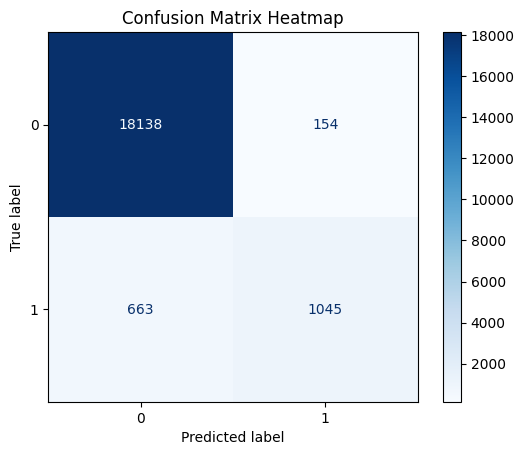

In [ ]:
#1.1.4: Logistic Regression
#Train the Logistic Regression model
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, precision_recall_curve, auc, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

#Predict and evaluate
lr_orig_y_pred = lr_model.predict(X_test)
lr_orig_y_pred_proba = lr_model.predict_proba(X_test)[:, 1]
print("Logistic Regression: ")
print(classification_report(y_test, lr_orig_y_pred))

##Confusion Matrix
lr_orig_conf_matrix = confusion_matrix(y_test, lr_orig_y_pred)
print("Confusion Matrix: ")
print(lr_orig_conf_matrix)

##ROC-AUC score
lr_orig_fpr, lr_orig_tpr, _ = roc_curve(y_test, lr_orig_y_pred_proba)
lr_orig_roc_auc = roc_auc_score(y_test, lr_orig_y_pred_proba)
print("ROC-AUC Score: ", lr_orig_roc_auc)
plt.figure(figsize=(10, 6))
plt.plot(lr_orig_fpr, lr_orig_tpr, label=f'Logistic Regression (AUC={lr_orig_roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

# Precision-Recall Curve
lr_orig_precision, lr_orig_recall, _ = precision_recall_curve(y_test, lr_orig_y_pred_proba)
lr_orig_pr_auc = auc(lr_orig_recall, lr_orig_precision)
print(f"\nPrecision-Recall AUC Score: {lr_orig_pr_auc:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(lr_orig_recall, lr_orig_precision, label=f'Logistic Regression (PR AUC={lr_orig_pr_auc:.2f})', color='blue')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, lr_orig_y_pred, cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.show()


# Cross-validation
#scores = cross_val_score(lr_model, X, y, cv=5, scoring='roc_auc')
#print("Cross-validated ROC-AUC scores:", scores)
#print("Mean ROC-AUC score:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

Best Parameters: {'C': 100, 'l1_ratio': 0.5, 'penalty': 'l1', 'solver': 'saga'}

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.86      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000


Confusion Matrix:
[[18126   166]
 [  657  1051]]

ROC-AUC Score: 0.96


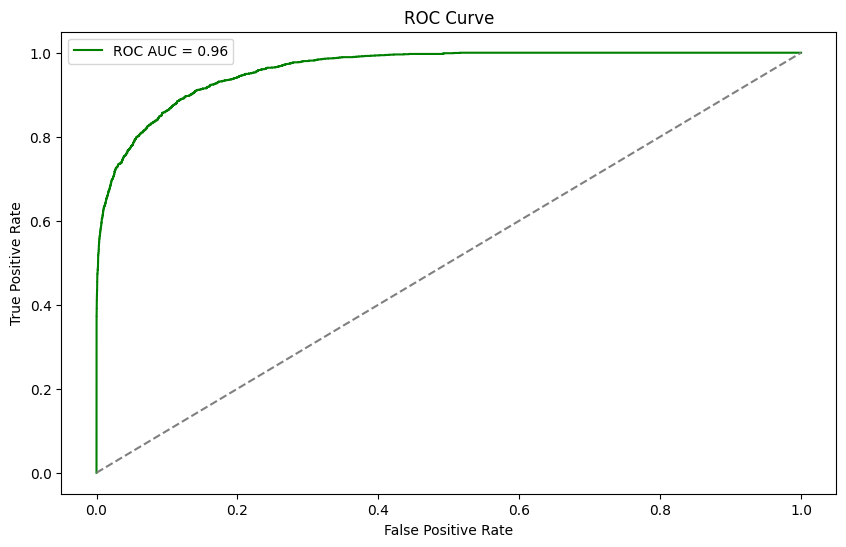

Precision-Recall AUC Score: 0.81


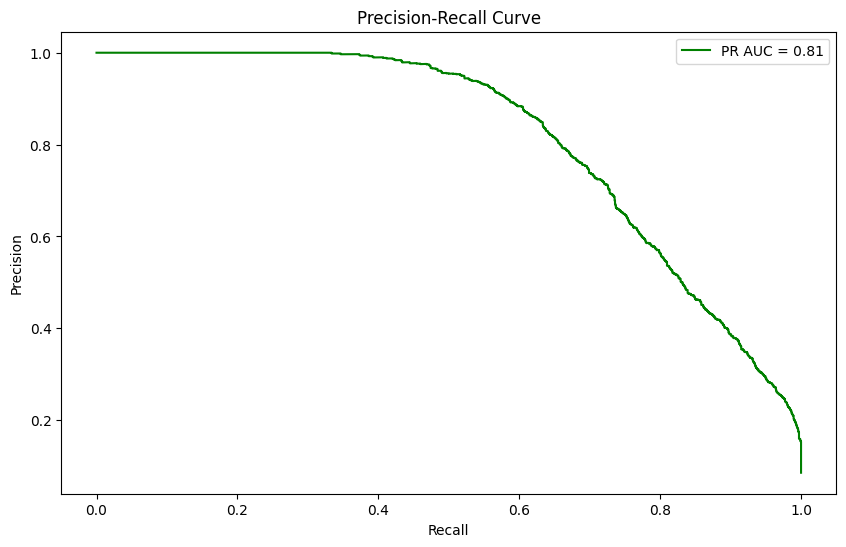

<Figure size 1000x600 with 0 Axes>

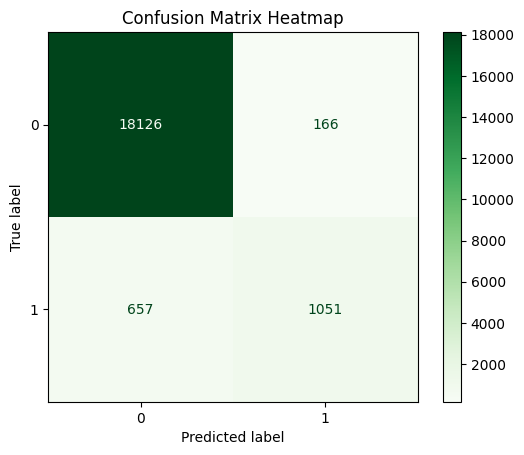

In [ ]:
# Regularization for Logistic Regression
lgr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers supporting L1 and Elastic Net
    'l1_ratio': [0.5]  # Only relevant for Elastic Net
}

# Perform GridSearchCV
scoring = make_scorer(f1_score, average='binary', pos_label=1)
lgr_grid = GridSearchCV(LogisticRegression(random_state=42), lgr_param_grid, cv=5, scoring=scoring, n_jobs=-1)
lgr_grid.fit(X_train, y_train)

# Best Logistic Regression Model
lgr_best = lgr_grid.best_estimator_
print("Best Parameters:", lgr_grid.best_params_)

# Predictions and probabilities
lgr_y_pred = lgr_best.predict(X_test)
lgr_y_pred_proba = lgr_best.predict_proba(X_test)[:, 1]

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, lgr_y_pred))

# Confusion Matrix
lgr_conf_matrix = confusion_matrix(y_test, lgr_y_pred)
print("\nConfusion Matrix:")
print(lgr_conf_matrix)

# ROC-AUC Score
lgr_roc_auc = roc_auc_score(y_test, lgr_y_pred_proba)
print(f"\nROC-AUC Score: {lgr_roc_auc:.2f}")
lgr_fpr, lgr_tpr, _ = roc_curve(y_test, lgr_y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(lgr_fpr, lgr_tpr, color='green', label=f'ROC AUC = {lgr_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

# Precision-Recall AUC Score
lgr_precision, lgr_recall, _ = precision_recall_curve(y_test, lgr_y_pred_proba)
lgr_pr_auc = auc(lgr_recall, lgr_precision)
print(f"Precision-Recall AUC Score: {lgr_pr_auc:.2f}")
# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(lgr_recall, lgr_precision, color='green', label=f'PR AUC = {lgr_pr_auc:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, lgr_y_pred, cmap='Greens')
plt.title("Confusion Matrix Heatmap")
plt.show()


Logistic Regression (after undersampling): 
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18292
           1       0.43      0.88      0.58      1708

    accuracy                           0.89     20000
   macro avg       0.71      0.88      0.76     20000
weighted avg       0.94      0.89      0.91     20000

Confusion Matrix: 
[[16281  2011]
 [  207  1501]]
ROC-AUC Score:  0.9616049791541946


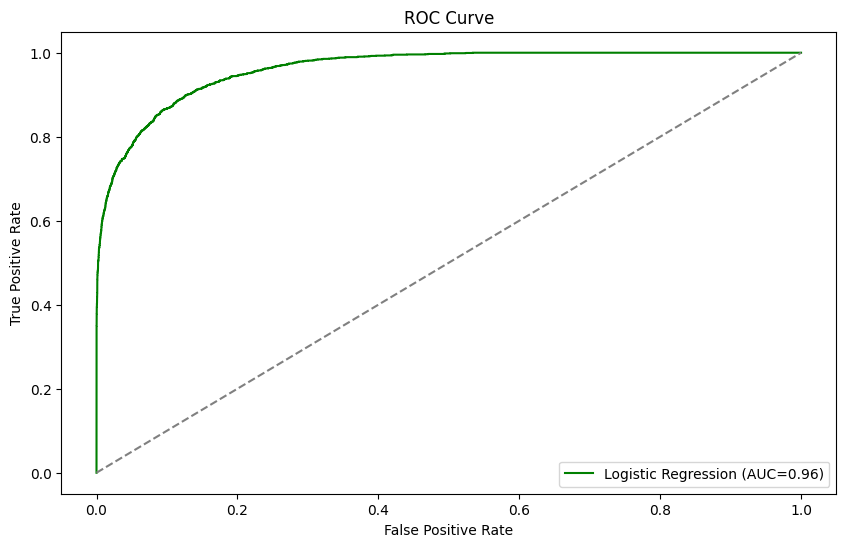


Precision-Recall AUC Score: 0.81


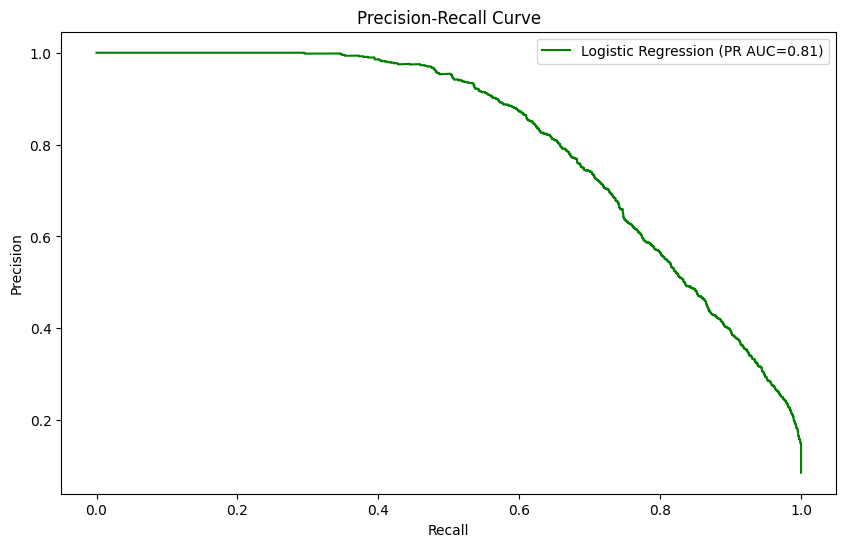

<Figure size 1000x600 with 0 Axes>

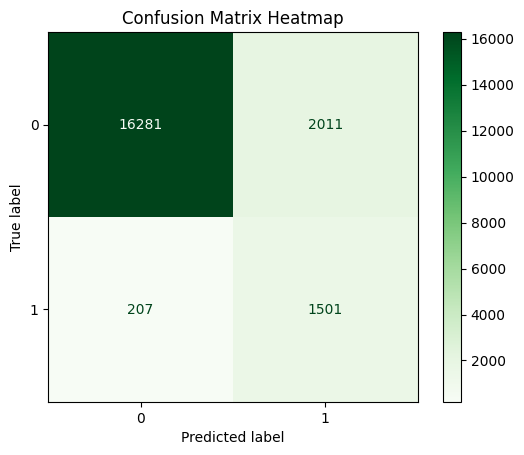

In [ ]:
#RandomUnderSampler for Logistic Regression
#apply RandomUnderSampler for undersampling the majority class
lr_undersampler = RandomUnderSampler(random_state=42)

# Resample the training data using RandomUnderSampler
lr_X_train_resampled, lr_y_train_resampled = lr_undersampler.fit_resample(X_train, y_train)

# Train the Logistic Regression model on the resampled data
lru = LogisticRegression(random_state=42)
lru.fit(lr_X_train_resampled, lr_y_train_resampled)

# Predict and evaluate the model
lru_y_pred = lru.predict(X_test)
lru_y_pred_proba = lru.predict_proba(X_test)[:, 1]

print("Logistic Regression (after undersampling): ")
print(classification_report(y_test, lru_y_pred))

# Confusion Matrix
lru_conf_matrix = confusion_matrix(y_test, lru_y_pred)
print("Confusion Matrix: ")
print(lru_conf_matrix)

# ROC-AUC score
lru_fpr, lru_tpr, _ = roc_curve(y_test, lru_y_pred_proba)
lru_roc_auc = roc_auc_score(y_test, lru_y_pred_proba)
print("ROC-AUC Score: ", lru_roc_auc)
# ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(lru_fpr, lru_tpr, label=f'Logistic Regression (AUC={lru_roc_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

# Precision-Recall Curve
lru_precision, lru_recall, _ = precision_recall_curve(y_test, lru_y_pred_proba)
lru_pr_auc = auc(lru_recall, lru_precision)
print(f"\nPrecision-Recall AUC Score: {lru_pr_auc:.2f}")
# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(lru_recall, lru_precision, label=f'Logistic Regression (PR AUC={lru_pr_auc:.2f})', color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, lru_y_pred, cmap='Greens')
plt.title("Confusion Matrix Heatmap")
plt.show()


Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     18292
           1       0.46      0.64      0.53      1708

    accuracy                           0.90     20000
   macro avg       0.71      0.78      0.74     20000
weighted avg       0.92      0.90      0.91     20000


Confusion Matrix:
[[17000  1292]
 [  620  1088]]

ROC-AUC Score: 0.9234


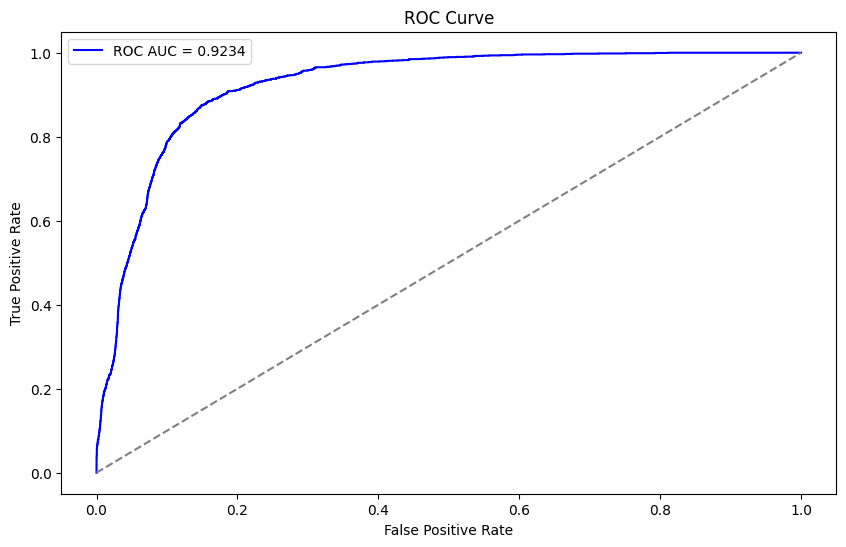

Precision-Recall AUC Score: 0.5131


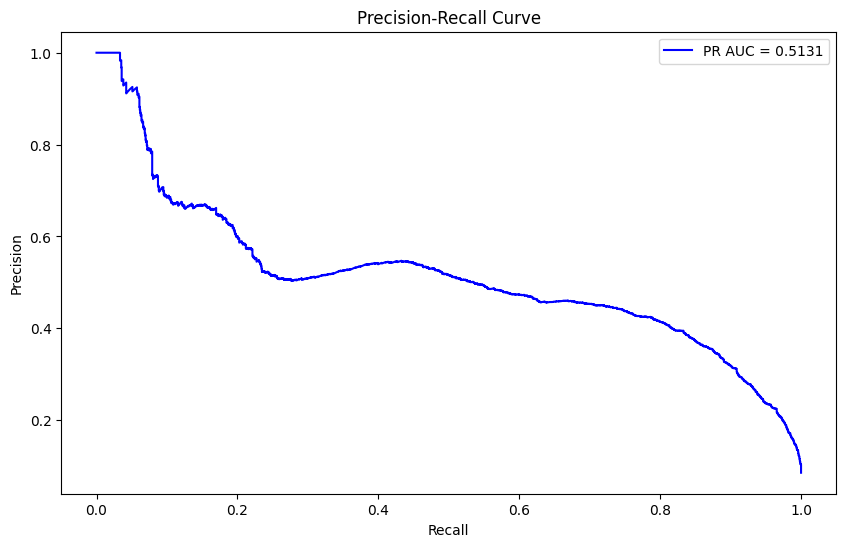

<Figure size 1000x600 with 0 Axes>

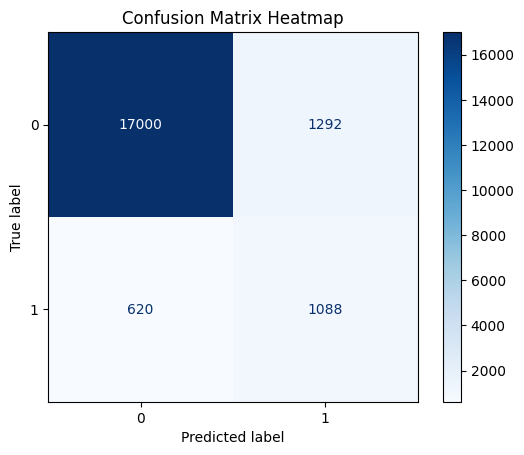

In [ ]:
#1.1.5: Naive Bayes Classifire
#Train the Naive Bayes Classifier

# Train the Naive Bayes Classifier
nb_model = GaussianNB(var_smoothing=1e-9)  # Use optimized var_smoothing if available
nb_model.fit(X_train, y_train)

# Predict and evaluate
nb_orig_y_pred = nb_model.predict(X_test)
nb_orig_y_pred_proba = nb_model.predict_proba(X_test)[:, 1]

print("Naive Bayes Classifier:")
print(classification_report(y_test, nb_orig_y_pred))

# Confusion Matrix
nb_orig_conf_matrix = confusion_matrix(y_test, nb_orig_y_pred)
print("\nConfusion Matrix:")
print(nb_orig_conf_matrix)

# ROC-AUC Score
nb_orig_roc_auc = roc_auc_score(y_test, nb_orig_y_pred_proba)
print(f"\nROC-AUC Score: {nb_orig_roc_auc:.4f}")
# Plot ROC Curve
nb_orig_fpr, nb_orig_tpr, _ = roc_curve(y_test, nb_orig_y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(nb_orig_fpr, nb_orig_tpr, color='blue', label=f'ROC AUC = {nb_orig_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()


# Precision-Recall AUC Score
nb_orig_precision, nb_orig_recall, _ = precision_recall_curve(y_test, nb_orig_y_pred_proba)
nb_orig_pr_auc = auc(nb_orig_recall, nb_orig_precision)
print(f"Precision-Recall AUC Score: {nb_orig_pr_auc:.4f}")
# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(nb_orig_recall, nb_orig_precision, color='blue', label=f'PR AUC = {nb_orig_pr_auc:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

#plot Heatmap
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, nb_orig_y_pred, cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.show()

# Cross-validation
#scores = cross_val_score(nb_model, X, y, cv=5, scoring='roc_auc')
#print("\nCross-validated ROC-AUC scores:", scores)
#print("Mean ROC-AUC score:", scores.mean())


In [ ]:
#Feature Selection Using Mutual Information for Naive Bayes
#Mutual Information measures the dependency between each feature and the target variable.

# Mutual Information Feature Selection
for k in range(1, 8):
  nbfs_selector = SelectKBest(score_func=mutual_info_classif, k=k)
  nbfs_X_train_selected = nbfs_selector.fit_transform(X_train, y_train)
  nbfs_X_test_selected = nbfs_selector.transform(X_test)

  # Get selected feature names
  selected_features = X_train.columns[nbfs_selector.get_support()]
  print("Selected Features:", selected_features)

  # Train Decision Tree on Selected Features
  nbfs = GaussianNB(var_smoothing=1e-9)
  nbfs.fit(nbfs_X_train_selected, y_train)

  # Evaluate Model
  nb_y_pred = nbfs.predict(nbfs_X_test_selected)
  print("Classification Report:")
  print(classification_report(y_test, nb_y_pred))

Selected Features: Index(['HbA1c_level'], dtype='object')
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     18292
           1       1.00      0.22      0.36      1708

    accuracy                           0.93     20000
   macro avg       0.97      0.61      0.66     20000
weighted avg       0.94      0.93      0.91     20000

Selected Features: Index(['HbA1c_level', 'blood_glucose_level'], dtype='object')
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       1.00      0.50      0.67      1708

    accuracy                           0.96     20000
   macro avg       0.98      0.75      0.82     20000
weighted avg       0.96      0.96      0.95     20000

Selected Features: Index(['age', 'HbA1c_level', 'blood_glucose_level'], dtype='object')
Classification Report:
              precision    recall  f1-score   supp

Selected Features: Index(['age', 'hypertension', 'bmi', 'HbA1c_level', 'blood_glucose_level'], dtype='object')
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     18292
           1       0.53      0.65      0.58      1708

    accuracy                           0.92     20000
   macro avg       0.75      0.80      0.77     20000
weighted avg       0.93      0.92      0.92     20000


Confusion Matrix:
[[17299   993]
 [  602  1106]]

ROC-AUC Score: 0.9351


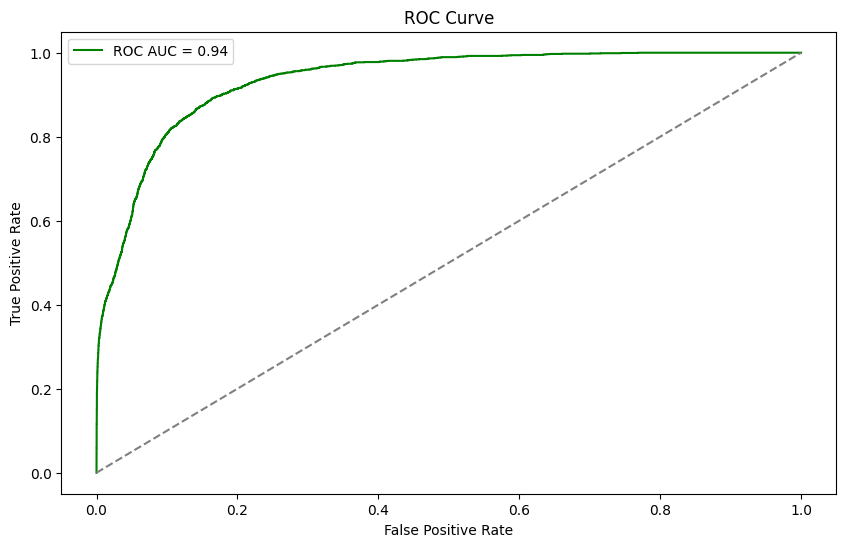

Precision-Recall AUC Score: 0.6588


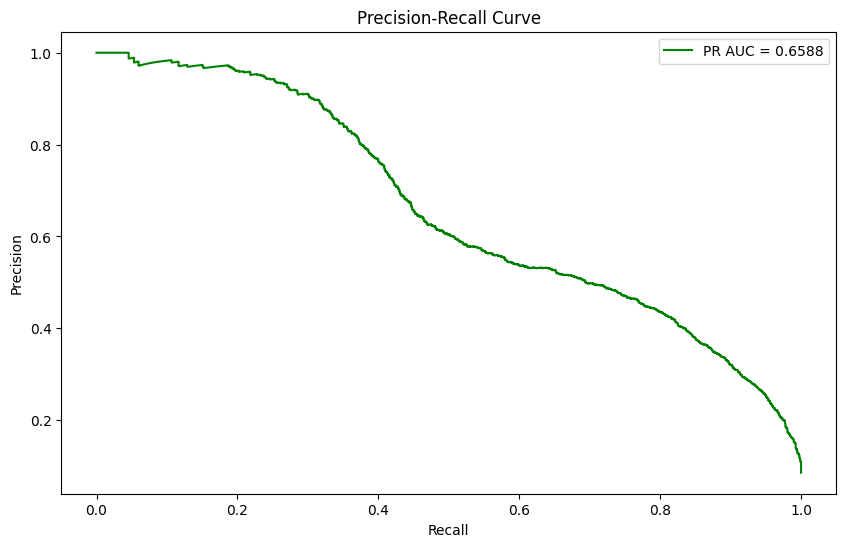

<Figure size 1000x600 with 0 Axes>

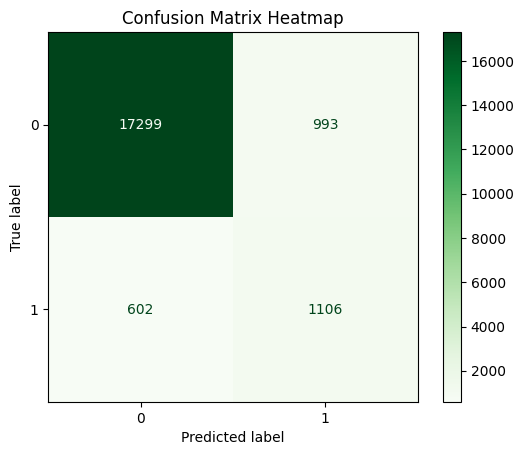

In [ ]:
#Feature Selection for Naive Bayes
# Select top k features using mutual information
k = 5  # Number of features to retain
nbfs_selector = SelectKBest(score_func=mutual_info_classif, k=k)
nbfs_X_train_selected = nbfs_selector.fit_transform(X_train, y_train)
nbfs_X_test_selected = nbfs_selector.transform(X_test)

# Get selected feature names
selected_features = X_train.columns[nbfs_selector.get_support()]
print("Selected Features:", selected_features)

# Train Decision Tree on Selected Features
nbfs = GaussianNB(var_smoothing=1e-9)
nbfs.fit(nbfs_X_train_selected, y_train)

# Evaluate Model
nb_y_pred = nbfs.predict(nbfs_X_test_selected)
print("Classification Report:")
print(classification_report(y_test, nb_y_pred))

# Predictions and probabilities
nbfs_y_pred_proba = nbfs.predict_proba(nbfs_X_test_selected)[:, 1]

# Confusion Matrix
nbfs_conf_matrix = confusion_matrix(y_test, nb_y_pred)
print("\nConfusion Matrix:")
print(nbfs_conf_matrix)

# ROC-AUC Score
nbfs_roc_auc = roc_auc_score(y_test, nbfs_y_pred_proba)
print(f"\nROC-AUC Score: {nbfs_roc_auc:.4f}")
# ROC Curve
nbfs_fpr, nbfs_tpr, _ = roc_curve(y_test, nbfs_y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(nbfs_fpr, nbfs_tpr, color='green', label=f'ROC AUC = {nbfs_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()


# Precision-Recall AUC Score
nbfs_precision, nbfs_recall, _ = precision_recall_curve(y_test, nbfs_y_pred_proba)
nbfs_pr_auc = auc(nbfs_recall, nbfs_precision)
print(f"Precision-Recall AUC Score: {nbfs_pr_auc:.4f}")

# Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(nbfs_recall, nbfs_precision, color='green', label=f'PR AUC = {nbfs_pr_auc:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

#Plot Heatmap
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, nb_y_pred, cmap='Greens')
plt.title("Confusion Matrix Heatmap")
plt.show()



Best smoothing parameter: {'var_smoothing': 0.001}
Best ROC-AUC score: 0.9224078969401466
Naive Bayes Classifier (with optimized smoothing):
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     18292
           1       0.46      0.61      0.52      1708

    accuracy                           0.91     20000
   macro avg       0.71      0.77      0.74     20000
weighted avg       0.92      0.91      0.91     20000


Confusion Matrix:
[[17058  1234]
 [  662  1046]]

ROC-AUC Score: 0.9232


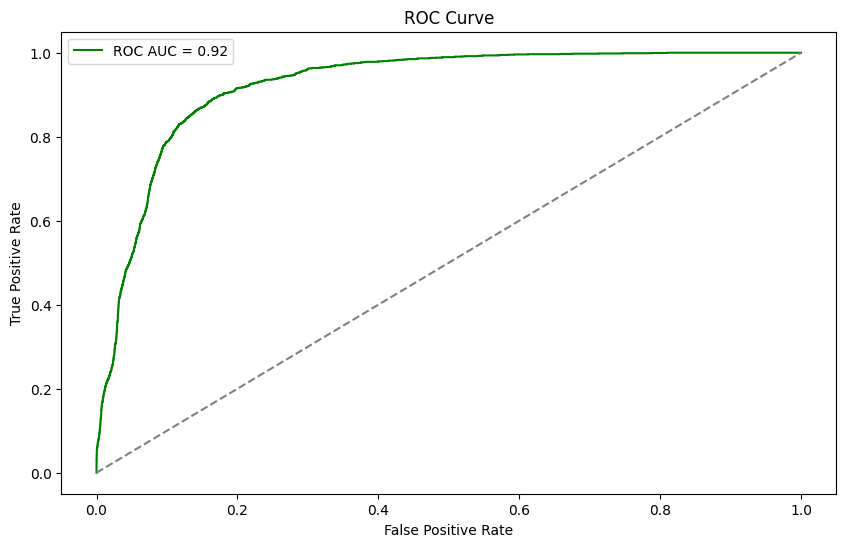

Precision-Recall AUC Score: 0.5097


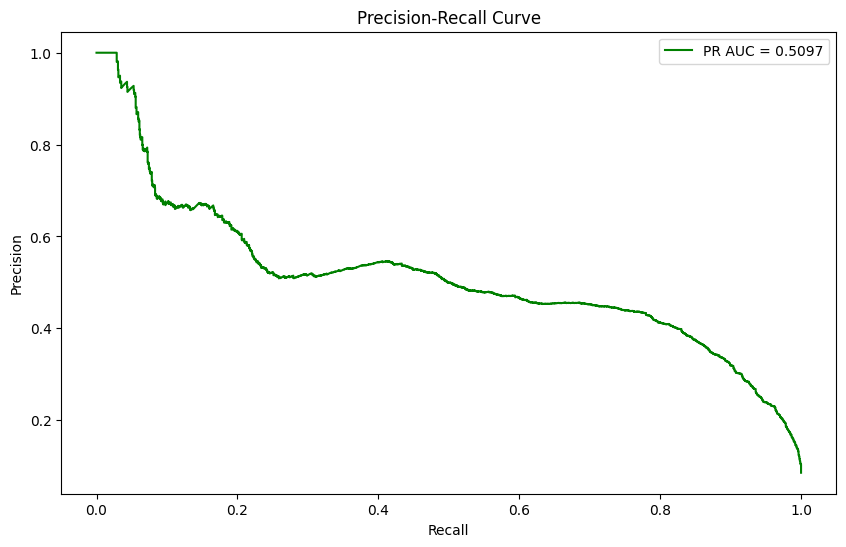

<Figure size 1000x600 with 0 Axes>

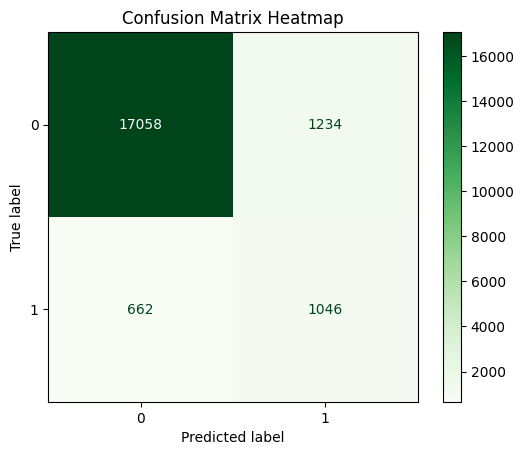

In [ ]:
#Apply smoothing value
#Define the parameter grid
nbs_param_grid = {
    'var_smoothing': [1e-9, 1e-6, 1e-3, 1e-2, 1e-1]  # Different smoothing values to test
}

# Set up the Gaussian Naive Bayes model
nbs = GaussianNB()

# Apply GridSearchCV to optimize var_smoothing
nbs_grid_search = GridSearchCV(nbs, nbs_param_grid, cv=5, scoring='roc_auc')
nbs_grid_search.fit(X_train, y_train)

# Display the best parameter and best score
print(f"Best smoothing parameter: {nbs_grid_search.best_params_}")
print(f"Best ROC-AUC score: {nbs_grid_search.best_score_}")

# Use the best model for predictions
nbs_best = nbs_grid_search.best_estimator_
nbs_y_pred = nbs_best.predict(X_test)

# Evaluate the best model
print("Naive Bayes Classifier (with optimized smoothing):")
print(classification_report(y_test, nbs_y_pred))

# Predictions and probabilities
nbs_y_pred_proba = nbs_best.predict_proba(X_test)[:, 1]

# Confusion Matrix
nbs_conf_matrix = confusion_matrix(y_test, nbs_y_pred)
print("\nConfusion Matrix:")
print(nbs_conf_matrix)

# ROC-AUC Score
nbs_roc_auc = roc_auc_score(y_test, nbs_y_pred_proba)
print(f"\nROC-AUC Score: {nbs_roc_auc:.4f}")
# ROC Curve
nbs_fpr, nbs_tpr, _ = roc_curve(y_test, nbs_y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(nbs_fpr, nbs_tpr, color='green', label=f'ROC AUC = {nbs_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()


# Precision-Recall AUC Score
nbs_precision, nbs_recall, _ = precision_recall_curve(y_test, nbs_y_pred_proba)
nbs_pr_auc = auc(nbs_recall, nbs_precision)
print(f"Precision-Recall AUC Score: {nbs_pr_auc:.4f}")

# Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(nbs_recall, nbs_precision, color='green', label=f'PR AUC = {nbs_pr_auc:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

#Plot Heatmap
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, nbs_y_pred, cmap='Greens')
plt.title("Confusion Matrix Heatmap")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.97      0.69      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000

Confusion Matrix: 
[[18261    31]
 [  526  1182]]
ROC-AUC Score:  0.9798665040091239


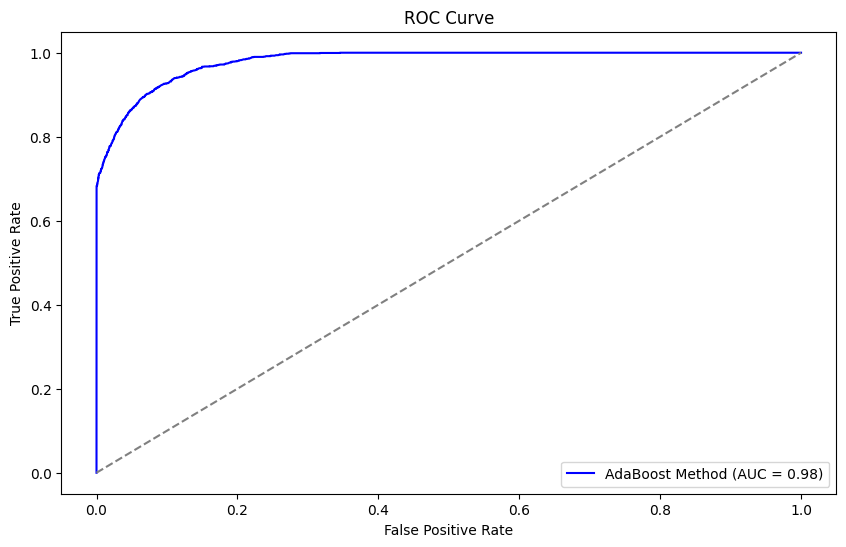


Precision-Recall AUC Score: 0.89


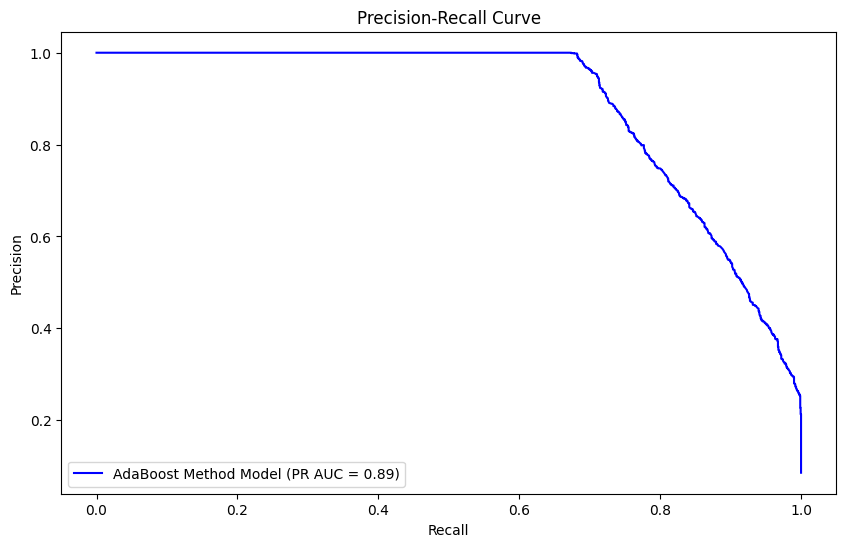

<Figure size 1000x600 with 0 Axes>

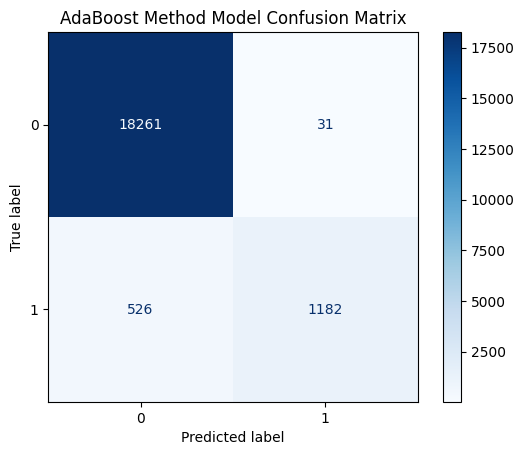

In [ ]:
#1.1.6: Ensemble Method: AdaMethod
#Train the AdaBoost Classifier
ab_model = AdaBoostClassifier(n_estimators = 100, random_state=42)
ab_model.fit(X_train, y_train)

#Predict and evaluate
ab_orig_y_pred = ab_model.predict(X_test)
print("AdaBoost Classifier: ")
print(classification_report(y_test, ab_orig_y_pred))

##Confusion Matrix
ab_orig_conf_matrix = confusion_matrix(y_test, ab_orig_y_pred)
print("Confusion Matrix: ")
print(ab_orig_conf_matrix)

##ROC-AUC score
ab_orig_y_pred_proba = ab_model.predict_proba(X_test)[:, 1]
ab_orig_fpr, ab_orig_tpr, _ = roc_curve(y_test, ab_orig_y_pred_proba)
ab_orig_roc_auc = roc_auc_score(y_test, ab_orig_y_pred_proba)
print("ROC-AUC Score: ", ab_orig_roc_auc)
plt.figure(figsize=(10, 6))
plt.plot(ab_orig_fpr, ab_orig_tpr, label=f'AdaBoost Method (AUC = {ab_orig_roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

#compute precision-recall curve
ab_orig_precision, ab_orig_recall, _ = precision_recall_curve(y_test, ab_orig_y_pred_proba)
ab_orig_pr_auc = auc(ab_orig_recall, ab_orig_precision)
print(f"\nPrecision-Recall AUC Score: {ab_orig_pr_auc:.2f}")
#plot precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(ab_orig_recall, ab_orig_precision, label=f'AdaBoost Method Model (PR AUC = {ab_orig_pr_auc:.2f})', color='blue')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

# Confusion Matrix Heatmaps
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, ab_orig_y_pred, cmap='Blues')
plt.title("AdaBoost Method Model Confusion Matrix")
plt.show()

# Cross-validation
#scores = cross_val_score(ab_model, X, y, cv=5, scoring='roc_auc')
#print("Cross-validated ROC-AUC scores:", scores)
#print("Mean ROC-AUC score:", scores.mean())



In [ ]:
#Feature Selection for AdaMethod
for k in range(1, 8):
  abfs_selector = SelectKBest(score_func=mutual_info_classif, k=k)
  abfs_X_train_selected = abfs_selector.fit_transform(X_train, y_train)
  abfs_X_test_selected = abfs_selector.transform(X_test)

  # Train AdaBoostClassifier on selected features
  abfs = AdaBoostClassifier(
      estimator=DecisionTreeClassifier(max_depth=1),
      n_estimators=100,
      random_state=42,
  )
  abfs.fit(abfs_X_train_selected, y_train)

  # Predictions and probabilities
  abfs_y_pred = abfs.predict(abfs_X_test_selected)
  abfs_y_pred_proba = abfs.predict_proba(abfs_X_test_selected)[:, 1]

  # Classification Report
  print("\nClassification Report:")
  print(classification_report(y_test, abfs_y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     18292
           1       1.00      0.46      0.63      1708

    accuracy                           0.95     20000
   macro avg       0.98      0.73      0.80     20000
weighted avg       0.96      0.95      0.95     20000



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.98      0.68      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.99      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.98      0.69      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.98      0.70      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.98      0.70      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000


Confusion Matrix:
[[18264    28]
 [  519  1189]]

ROC-AUC Score: 0.98


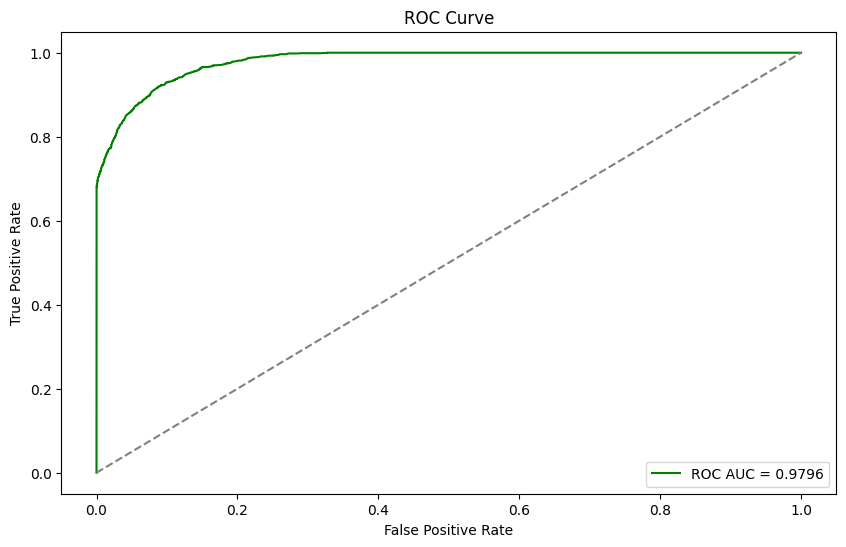

Precision-Recall AUC Score: 0.89


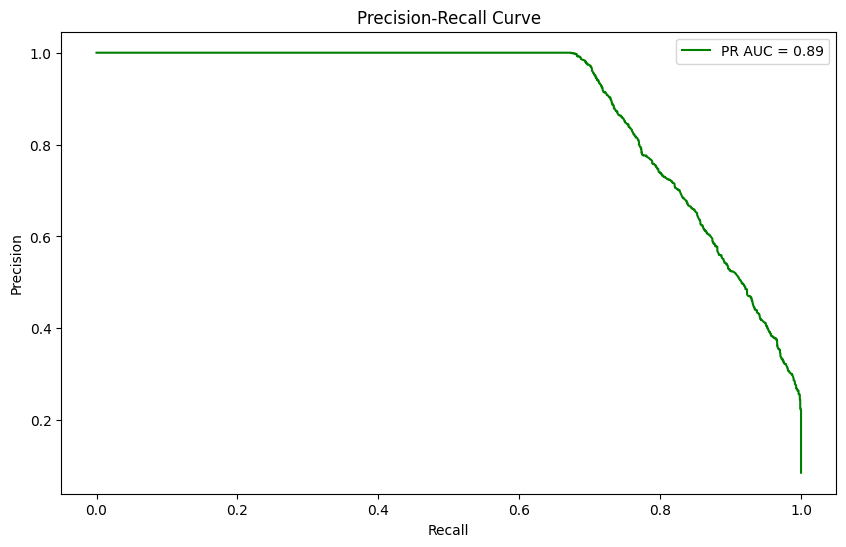

<Figure size 1000x600 with 0 Axes>

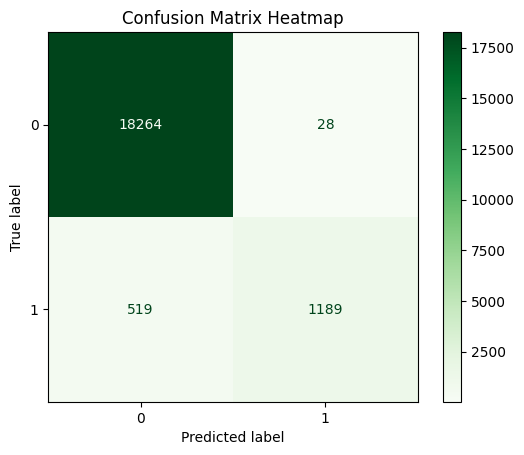

In [ ]:
from re import A
#Feature Selection for AdaMethod
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select top k features using mutual information
k = 7  # Number of features to retain
abfs_selector = SelectKBest(score_func=mutual_info_classif, k=k)
abfs_X_train_selected = abfs_selector.fit_transform(X_train, y_train)
abfs_X_test_selected = abfs_selector.transform(X_test)

# Train AdaBoostClassifier on selected features
abfs = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    random_state=42,
)
abfs.fit(abfs_X_train_selected, y_train)

# Predictions and probabilities
abfs_y_pred = abfs.predict(abfs_X_test_selected)
abfs_y_pred_proba = abfs.predict_proba(abfs_X_test_selected)[:, 1]

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, abfs_y_pred))

# Confusion Matrix
abfs_conf_matrix = confusion_matrix(y_test, abfs_y_pred)
print("\nConfusion Matrix:")
print(abfs_conf_matrix)

# ROC-AUC Score
abfs_roc_auc = roc_auc_score(y_test, abfs_y_pred_proba)
print(f"\nROC-AUC Score: {abfs_roc_auc:.2f}")
# ROC Curve
abfs_fpr, abfs_tpr, _ = roc_curve(y_test, abfs_y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(abfs_fpr, abfs_tpr, color='green', label=f'ROC AUC = {abfs_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()


# Precision-Recall AUC Score
abfs_precision, abfs_recall, _ = precision_recall_curve(y_test, abfs_y_pred_proba)
abfs_pr_auc = auc(abfs_recall, abfs_precision)
print(f"Precision-Recall AUC Score: {abfs_pr_auc:.2f}")

# Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(abfs_recall, abfs_precision, color='green', label=f'PR AUC = {abfs_pr_auc:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()


#plot Heatmap
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, abfs_y_pred, cmap='Greens')
plt.title("Confusion Matrix Heatmap")
plt.show()

Class distribution after oversampling:
diabetes
0    73208
1    73208
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier (With Oversampling):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     18292
           1       0.67      0.82      0.74      1708

    accuracy                           0.95     20000
   macro avg       0.83      0.89      0.85     20000
weighted avg       0.96      0.95      0.95     20000


Confusion Matrix:
[[17594   698]
 [  304  1404]]
ROC-AUC Score (With Oversampling): 0.9754941276589861


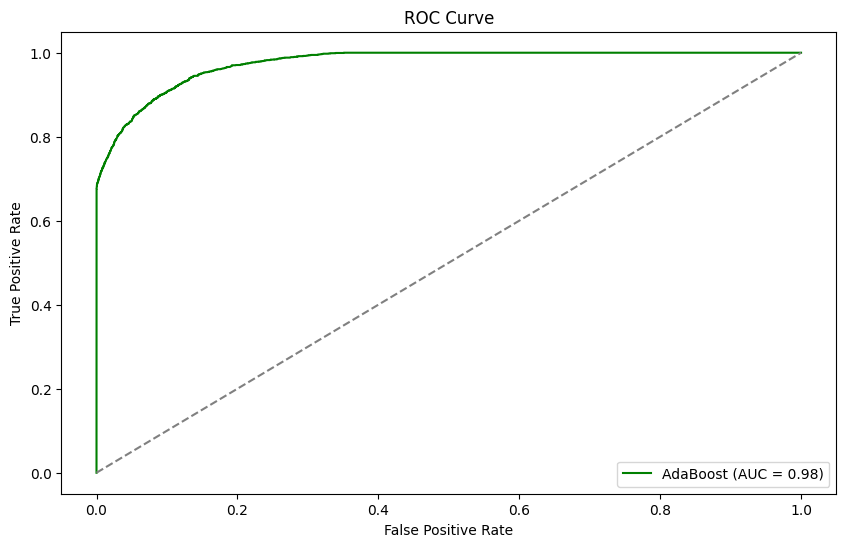


Precision-Recall AUC Score (With Oversampling): 0.88


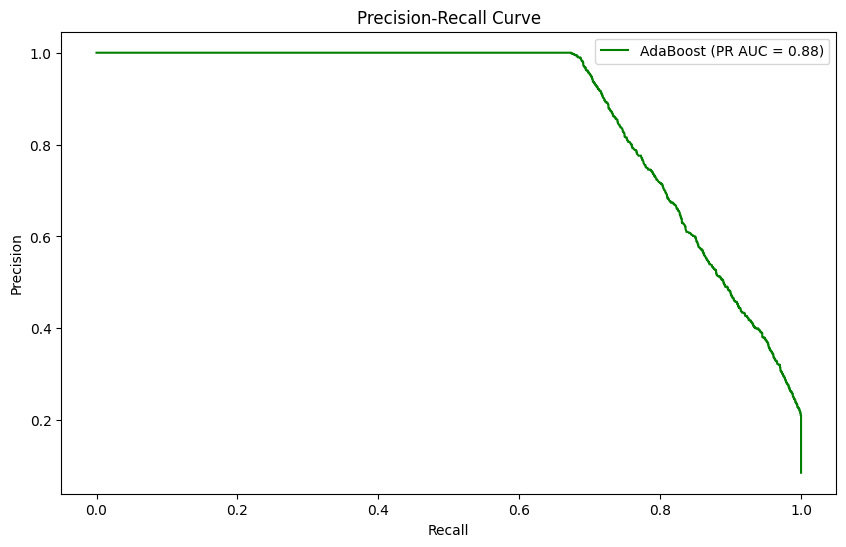

<Figure size 1000x600 with 0 Axes>

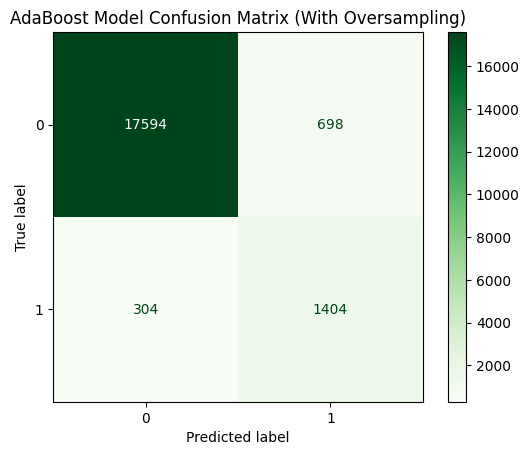

In [ ]:
# Apply SMOTE to the AdaMethod
ab_smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = ab_smote.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after oversampling:")
print(y_train_oversampled.value_counts())
# Train the AdaBoost Classifier
abos = AdaBoostClassifier(n_estimators=100, random_state=42)
abos.fit(X_train_oversampled, y_train_oversampled)

# Predict and evaluate
abos_y_pred = abos.predict(X_test)
print("AdaBoost Classifier (With Oversampling):")
print(classification_report(y_test, abos_y_pred))

# Confusion Matrix
abos_conf_matrix = confusion_matrix(y_test, abos_y_pred)
print("\nConfusion Matrix:")
print(abos_conf_matrix)
# Compute ROC-AUC
abos_y_pred_proba = abos.predict_proba(X_test)[:, 1]
abos_fpr, abos_tpr, _ = roc_curve(y_test, abos_y_pred_proba)
abos_roc_auc = roc_auc_score(y_test, abos_y_pred_proba)
print("ROC-AUC Score (With Oversampling):", abos_roc_auc)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(abos_fpr, abos_tpr, label=f'AdaBoost (AUC = {abos_roc_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()
# Compute Precision-Recall AUC
abos_precision, abos_recall, _ = precision_recall_curve(y_test, abos_y_pred_proba)
abos_pr_auc = auc(abos_recall, abos_precision)
print(f"\nPrecision-Recall AUC Score (With Oversampling): {abos_pr_auc:.2f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(abos_recall, abos_precision, label=f'AdaBoost (PR AUC = {abos_pr_auc:.2f})', color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()
# Plot Confusion Matrix Heatmap
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, abos_y_pred, cmap='Greens')
plt.title("AdaBoost Model Confusion Matrix (With Oversampling)")
plt.show()


Random Forest Classifier: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

Confusion Matrix: 
[[18230    62]
 [  527  1181]]
ROC-AUC Score:  0.9637790365094786


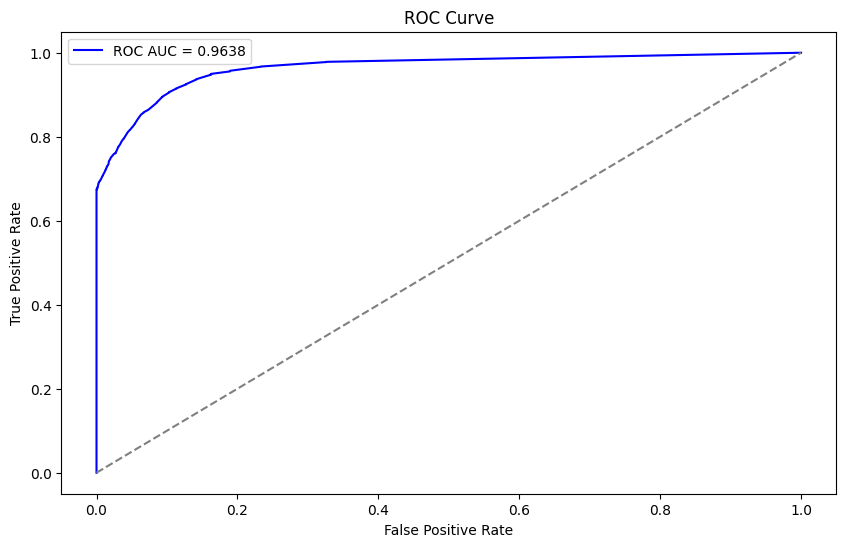

Precision-Recall AUC Score: 0.86


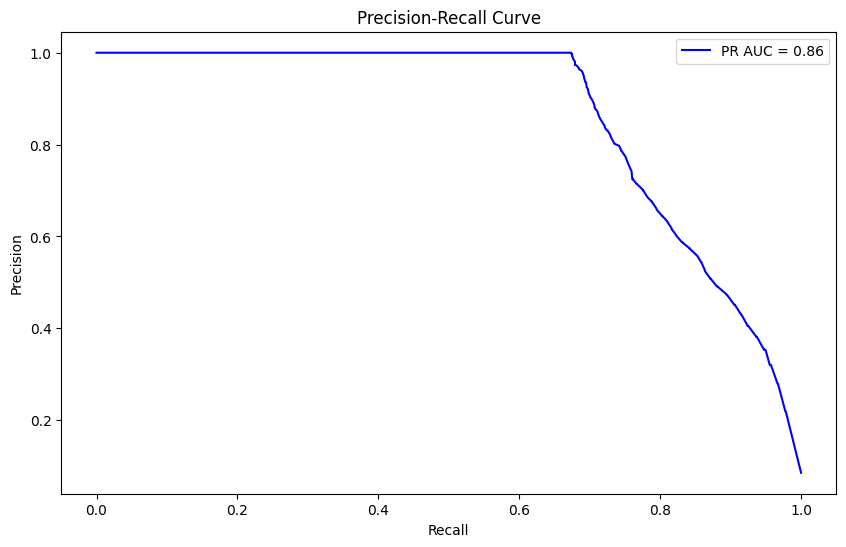

<Figure size 1000x600 with 0 Axes>

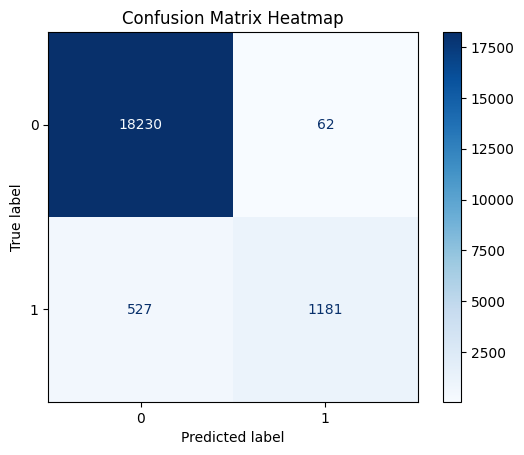

In [ ]:
#1.1.6: Ensemble Method: Random Forest
#Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#Predict and evaluate
rf_orig_y_pred = rf_model.predict(X_test)
print("Random Forest Classifier: ")
print(classification_report(y_test, rf_orig_y_pred))

##Confusion Matrix
rf_orig_conf_matrix = confusion_matrix(y_test, rf_orig_y_pred)
print("Confusion Matrix: ")
print(rf_orig_conf_matrix)

##ROC-AUC score
rf_orig_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
rf_orig_roc_auc = roc_auc_score(y_test, rf_orig_y_pred_proba)
print("ROC-AUC Score: ", rf_orig_roc_auc)

# ROC Curve
rf_orig_fpr, rf_orig_tpr, _ = roc_curve(y_test, rf_orig_y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(rf_orig_fpr, rf_orig_tpr, color='blue', label=f'ROC AUC = {rf_orig_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

# Cross-validation
#scores = cross_val_score(rf_model, X, y, cv=5, scoring='roc_auc')
#print("Cross-validated ROC-AUC scores:", scores)
#print("Mean ROC-AUC score:", scores.mean())

# Precision-Recall AUC Score
rf_orig_precision, rf_orig_recall, _ = precision_recall_curve(y_test, rf_orig_y_pred_proba)
rf_orig_pr_auc = auc(rf_orig_recall, rf_orig_precision)
print(f"Precision-Recall AUC Score: {rf_orig_pr_auc:.2f}")
# Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(rf_orig_recall, rf_orig_precision, color='blue', label=f'PR AUC = {rf_orig_pr_auc:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()



#plot Heatmap
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, rf_orig_y_pred, cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.show()

In [ ]:
#Feature Selection Using Mutual Information for Random Forest
#Mutual Information measures the dependency between each feature and the target variable.

# Mutual Information Feature Selection
for k in range(1, 8):
  rdfs_selector = SelectKBest(score_func=mutual_info_classif, k=k)
  rdfs_X_train_selected = rdfs_selector.fit_transform(X_train, y_train)
  rdfs_X_test_selected = rdfs_selector.transform(X_test)

  # Get selected feature names
  selected_features = X_train.columns[rdfs_selector.get_support()]
  print("Selected Features:", selected_features)

  # Train Random Forest on Selected Features
  rdfs = RandomForestClassifier(random_state=42)
  rdfs.fit(rdfs_X_train_selected, y_train)

  # Evaluate Model
  rdfs_y_pred = rdfs.predict(rdfs_X_test_selected)
  print("Classification Report:")
  print(classification_report(y_test, rdfs_y_pred))

Selected Features: Index(['HbA1c_level'], dtype='object')
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     18292
           1       1.00      0.46      0.63      1708

    accuracy                           0.95     20000
   macro avg       0.98      0.73      0.80     20000
weighted avg       0.96      0.95      0.95     20000

Selected Features: Index(['HbA1c_level', 'blood_glucose_level'], dtype='object')
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

Selected Features: Index(['age', 'HbA1c_level', 'blood_glucose_level'], dtype='object')
Classification Report:
              precision    recall  f1-score   supp

Selected Features: Index(['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'HbA1c_level', 'blood_glucose_level'],
      dtype='object')
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.94      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000


Confusion Matrix:
[[18264    28]
 [  519  1189]]

ROC-AUC Score: 0.96


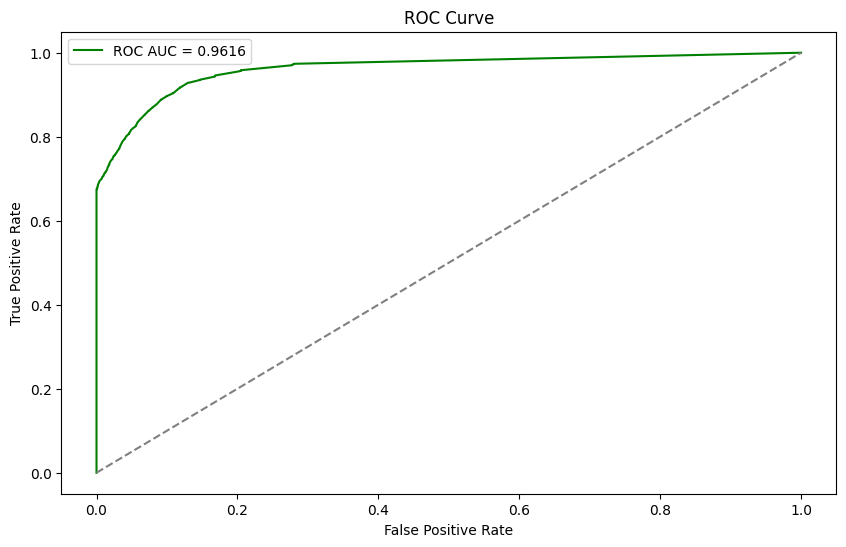

Precision-Recall AUC Score: 0.86


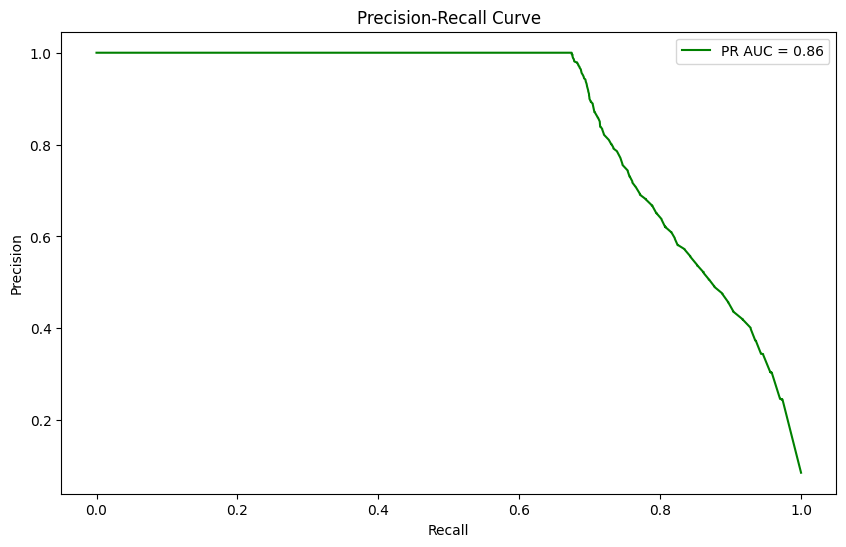

<Figure size 1000x600 with 0 Axes>

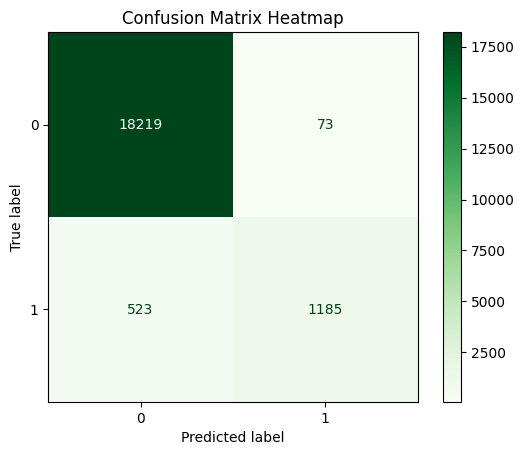

In [ ]:
# Select top k features using mutual information
k = 7  # Number of features to retain
rdfs_selector = SelectKBest(score_func=mutual_info_classif, k=k)
rdfs_X_train_selected = rdfs_selector.fit_transform(X_train, y_train)
rdfs_X_test_selected = rdfs_selector.transform(X_test)

# Get selected feature names
selected_features = X_train.columns[rdfs_selector.get_support()]
print("Selected Features:", selected_features)

# Train Random Forest on Selected Features
rdfs = RandomForestClassifier(random_state=42)
rdfs.fit(rdfs_X_train_selected, y_train)

# Evaluate Model
rdfs_y_pred_proba = rdfs.predict_proba(rdfs_X_test_selected)[:, 1]
rdfs_y_pred = rdfs.predict(rdfs_X_test_selected)
print("Classification Report:")
print(classification_report(y_test, rdfs_y_pred))

# Confusion Matrix
rdfs_conf_matrix = confusion_matrix(y_test, abfs_y_pred)
print("\nConfusion Matrix:")
print(abfs_conf_matrix)

# ROC-AUC Score
rdfs_roc_auc = roc_auc_score(y_test, rdfs_y_pred_proba)
print(f"\nROC-AUC Score: {rdfs_roc_auc:.2f}")
# ROC Curve
rdfs_fpr, rdfs_tpr, _ = roc_curve(y_test, rdfs_y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(rdfs_fpr, rdfs_tpr, color='green', label=f'ROC AUC = {rdfs_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()


# Precision-Recall AUC Score
rdfs_precision, rdfs_recall, _ = precision_recall_curve(y_test, rdfs_y_pred_proba)
rdfs_pr_auc = auc(rdfs_recall, rdfs_precision)
print(f"Precision-Recall AUC Score: {rdfs_pr_auc:.2f}")

# Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(rdfs_recall, rdfs_precision, color='green', label=f'PR AUC = {rdfs_pr_auc:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()


#plot Heatmap
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, rdfs_y_pred, cmap='Greens')
plt.title("Confusion Matrix Heatmap")
plt.show()

Logistic Regression (after undersampling): 
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     18292
           1       0.46      0.91      0.62      1708

    accuracy                           0.90     20000
   macro avg       0.73      0.91      0.78     20000
weighted avg       0.95      0.90      0.92     20000

Confusion Matrix: 
[[16497  1795]
 [  150  1558]]
ROC-AUC Score:  0.9747635898469328


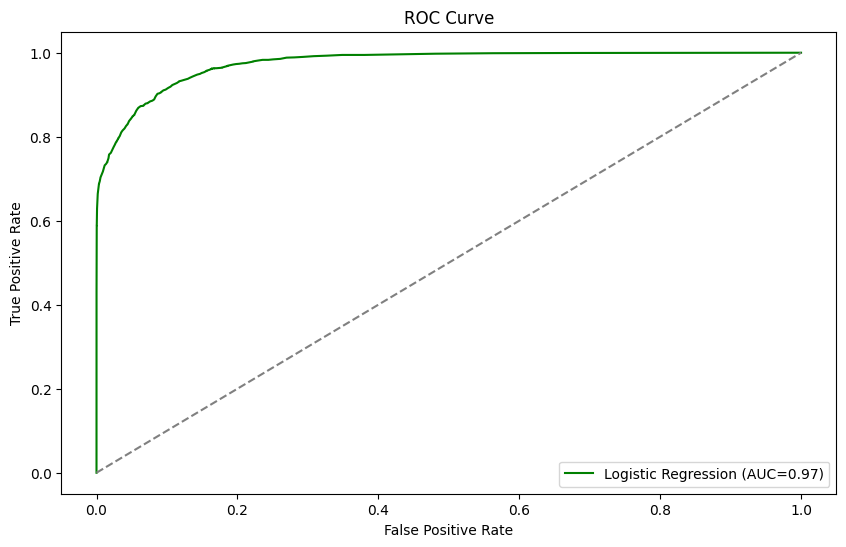


Precision-Recall AUC Score: 0.87


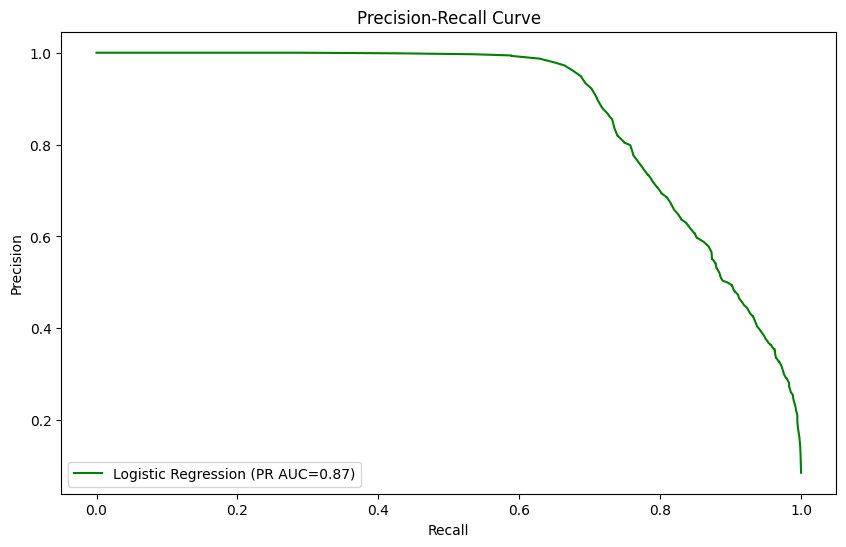

<Figure size 1000x600 with 0 Axes>

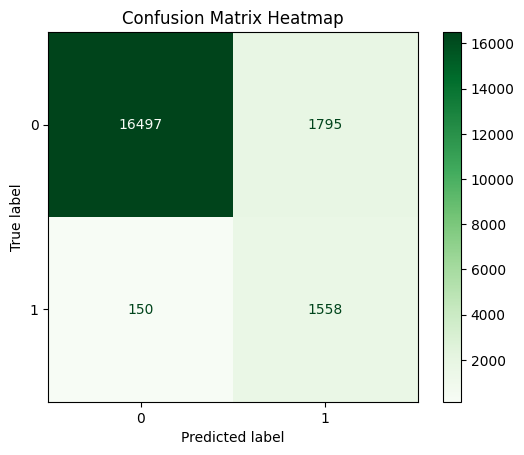

In [ ]:
# Apply RandomUnderSampler for Random Forest
rf_undersampler = RandomUnderSampler(random_state=42)

# Resample the training data using RandomUnderSampler
rf_X_train_resampled, rf_y_train_resampled = rf_undersampler.fit_resample(X_train, y_train)

# Train the Logistic Regression model on the resampled data
rfu = RandomForestClassifier(n_estimators=100, random_state=42)
rfu.fit(rf_X_train_resampled, rf_y_train_resampled)

# Predict and evaluate the model
rfu_y_pred = rfu.predict(X_test)
rfu_y_pred_proba = rfu.predict_proba(X_test)[:, 1]

print("Logistic Regression (after undersampling): ")
print(classification_report(y_test, rfu_y_pred))

# Confusion Matrix
rfu_conf_matrix = confusion_matrix(y_test, rfu_y_pred)
print("Confusion Matrix: ")
print(rfu_conf_matrix)

# ROC-AUC score
rfu_fpr, rfu_tpr, _ = roc_curve(y_test, rfu_y_pred_proba)
rfu_roc_auc = roc_auc_score(y_test, rfu_y_pred_proba)
print("ROC-AUC Score: ", rfu_roc_auc)
# ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(rfu_fpr, rfu_tpr, label=f'Logistic Regression (AUC={rfu_roc_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

# Precision-Recall Curve
rfu_precision, rfu_recall, _ = precision_recall_curve(y_test, rfu_y_pred_proba)
rfu_pr_auc = auc(rfu_recall, rfu_precision)
print(f"\nPrecision-Recall AUC Score: {rfu_pr_auc:.2f}")
# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(rfu_recall, rfu_precision, label=f'Logistic Regression (PR AUC={rfu_pr_auc:.2f})', color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, rfu_y_pred, cmap='Greens')
plt.title("Confusion Matrix Heatmap")
plt.show()


Support Vector Machine (SVM): 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.93      0.57      0.71      1708

    accuracy                           0.96     20000
   macro avg       0.94      0.78      0.84     20000
weighted avg       0.96      0.96      0.95     20000

Confusion Matrix: 
[[18214    78]
 [  735   973]]
ROC-AUC Score:  0.9593521034777491


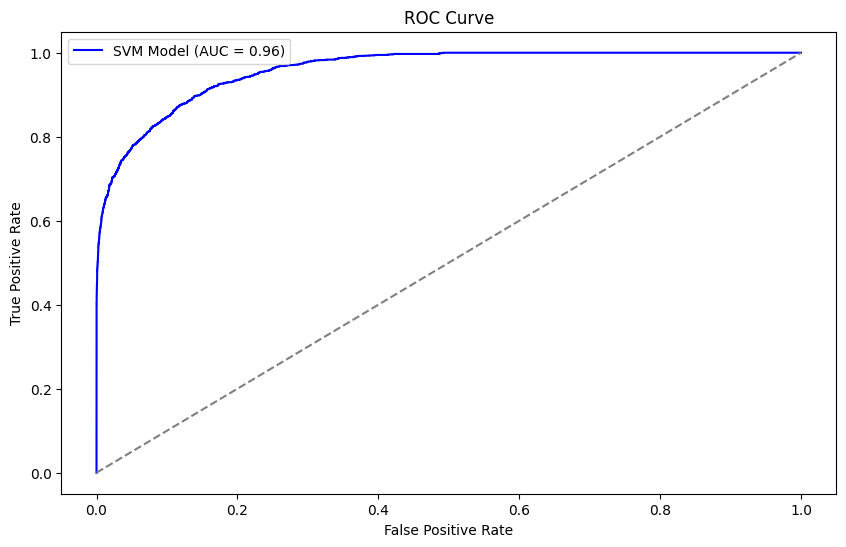

Precision-Recall: 0.8101436636490974


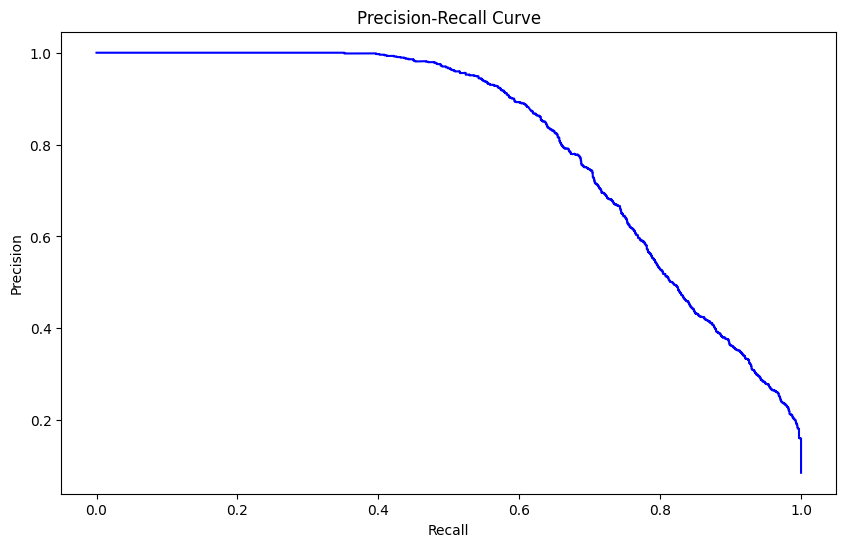

<Figure size 1000x600 with 0 Axes>

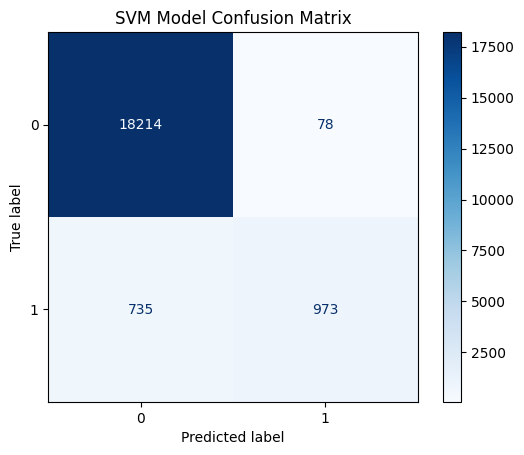

In [ ]:
#1.1.2: Support Vector Machine (SVM)
#Train the SVM Classifier
svm_model = SVC(kernel='linear', C=1.0,probability = True, random_state=42)
svm_model.fit(X_train, y_train)

#Predict and evaluate
svm_orig_y_pred = svm_model.predict(X_test)
print("Support Vector Machine (SVM): ")
print(classification_report(y_test, svm_orig_y_pred))

##Confusion Matrix
svm_orig_conf_matrix = confusion_matrix(y_test, svm_orig_y_pred)
print("Confusion Matrix: ")
print(svm_orig_conf_matrix)

##ROC-AUC score
# ROC Curves
svm_orig_y_pred_proba= svm_model.predict_proba(X_test)[:, 1]
svm_orig_fpr, svm_orig_tpr, _ = roc_curve(y_test, svm_orig_y_pred_proba)
roc_auc = auc(svm_orig_fpr, svm_orig_tpr)
print("ROC-AUC Score: ", roc_auc)
plt.figure(figsize=(10, 6))
plt.plot(svm_orig_fpr, svm_orig_tpr, label=f'SVM Model (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

# Compute precision-recall curve
svm_orig_precision, svm_orig_recall, _ = precision_recall_curve(y_test, svm_orig_y_pred_proba)
svm_orig_pr_auc = auc(svm_orig_recall, svm_orig_precision)
print("Precision-Recall:", svm_orig_pr_auc)
# Plot precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(svm_orig_recall, svm_orig_precision, label=f'SVM(PR AUC={svm_orig_pr_auc: .2f})', color='blue')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# Confusion Matrix Heatmaps
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, svm_orig_y_pred, cmap='Blues')
plt.title("SVM Model Confusion Matrix")
plt.show()


Logistic Regression (after undersampling): 
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     18292
           1       0.46      0.91      0.62      1708

    accuracy                           0.90     20000
   macro avg       0.73      0.91      0.78     20000
weighted avg       0.95      0.90      0.92     20000

Confusion Matrix: 
[[16497  1795]
 [  150  1558]]
ROC-AUC Score:  0.9747635898469328


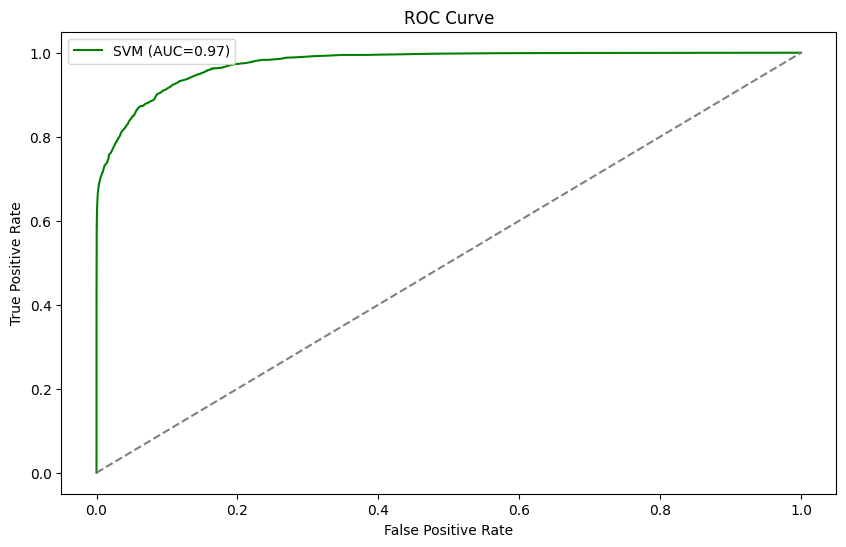


Precision-Recall AUC Score: 0.87


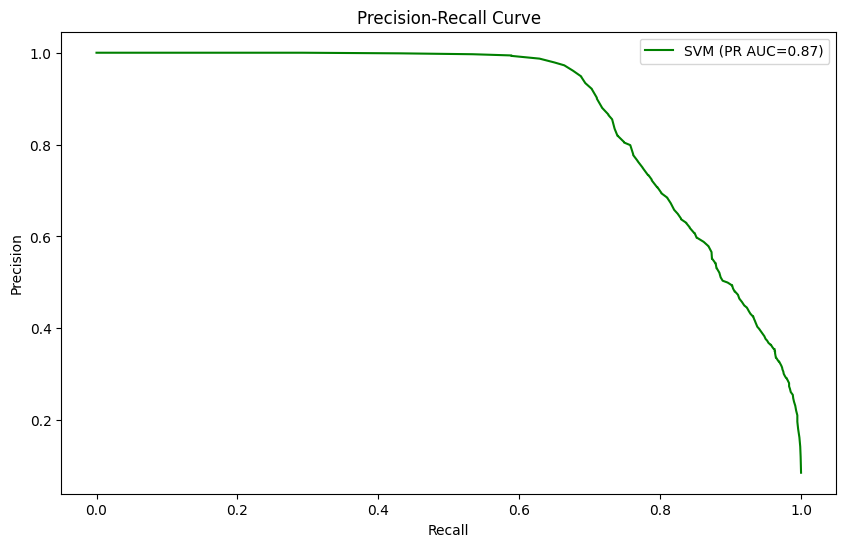

<Figure size 1000x600 with 0 Axes>

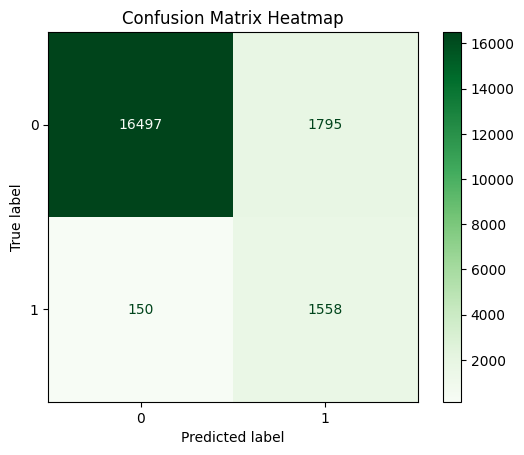

In [ ]:
# Apply RandomUnderSampler for Random Forest
svm_undersampler = RandomUnderSampler(random_state=42)

# Resample the training data using RandomUnderSampler
svmu_X_train_resampled, svmu_y_train_resampled = svm_undersampler.fit_resample(X_train, y_train)

# Train the Logistic Regression model on the resampled data
svmu = RandomForestClassifier(n_estimators=100, random_state=42)
svmu.fit(rf_X_train_resampled, rf_y_train_resampled)

# Predict and evaluate the model
svmu_y_pred = svmu.predict(X_test)
svmu_y_pred_proba = svmu.predict_proba(X_test)[:, 1]

print("Logistic Regression (after undersampling): ")
print(classification_report(y_test, svmu_y_pred))

# Confusion Matrix
svmu_conf_matrix = confusion_matrix(y_test, svmu_y_pred)
print("Confusion Matrix: ")
print(svmu_conf_matrix)

# ROC-AUC score
svmu_fpr, svmu_tpr, _ = roc_curve(y_test, svmu_y_pred_proba)
svmu_roc_auc = roc_auc_score(y_test, svmu_y_pred_proba)
print("ROC-AUC Score: ", svmu_roc_auc)
# ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(svmu_fpr, svmu_tpr, label=f'SVM (AUC={svmu_roc_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

# Precision-Recall Curve
svmu_precision, svmu_recall, _ = precision_recall_curve(y_test, svmu_y_pred_proba)
svmu_pr_auc = auc(svmu_recall, svmu_precision)
print(f"\nPrecision-Recall AUC Score: {svmu_pr_auc:.2f}")
# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(svmu_recall, svmu_precision, label=f'SVM (PR AUC={rfu_pr_auc:.2f})', color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, svmu_y_pred, cmap='Greens')
plt.title("Confusion Matrix Heatmap")
plt.show()


Weighted Averaging Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.88      0.72      0.79      1708

    accuracy                           0.97     20000
   macro avg       0.93      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000

Weighted Averaging ROC-AUC Score: 0.9722706903774369


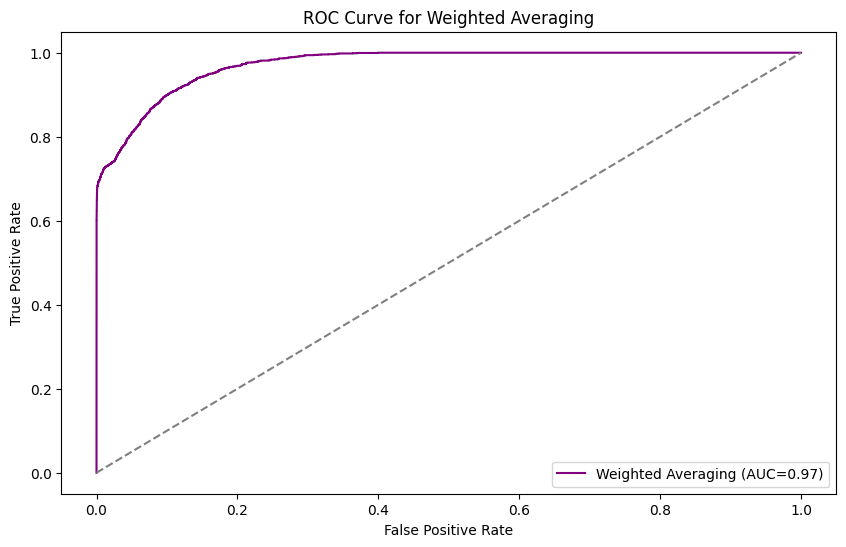


Precision-Recall AUC Score: 0.86


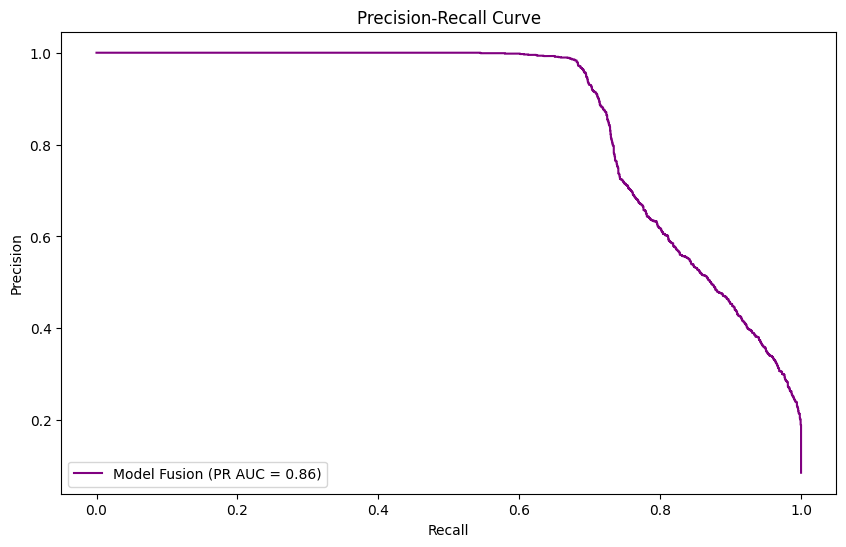

<Figure size 1000x600 with 0 Axes>

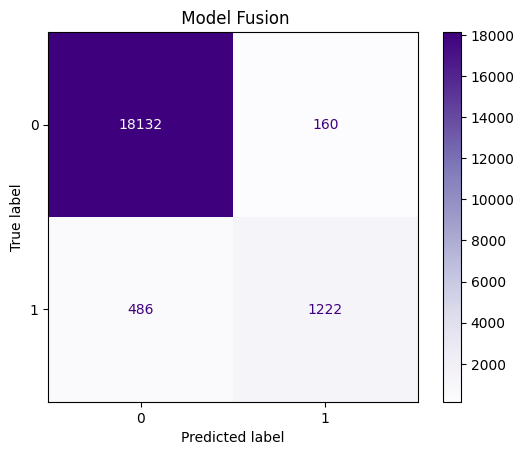

In [ ]:
# Obtain predicted probabilities from individual models
# Assign weights based on individual model performance
final_proba = (0.4 * y_pred_proba_original) + (0.3 * mlp_orig_y_pred_proba) + (0.3 * svm_orig_y_pred_proba)
final_pred = (final_proba >= 0.5).astype(int)

# Evaluate
print("Weighted Averaging Classification Report:")
print(classification_report(y_test, final_pred))

# ROC-AUC Score
roc_auc_weighted = roc_auc_score(y_test, final_proba)
print("Weighted Averaging ROC-AUC Score:", roc_auc_weighted)

# Plot ROC Curve
fpr_weighted, tpr_weighted, _ = roc_curve(y_test, final_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr_weighted, tpr_weighted, label=f'Weighted Averaging (AUC={roc_auc_weighted:.2f})', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Weighted Averaging")
plt.legend(loc="best")
plt.show()

# Compute Precision-Recall AUC
mf_precision, mf_recall, _ = precision_recall_curve(y_test, final_proba)
mf_pr_auc = auc(mf_recall, mf_precision)
print(f"\nPrecision-Recall AUC Score: {mf_pr_auc:.2f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(mf_recall, mf_precision, label=f'Model Fusion (PR AUC = {mf_pr_auc:.2f})', color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()
# Plot Confusion Matrix Heatmap
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, final_pred, cmap='Purples')
plt.title(" Model Fusion")
plt.show()



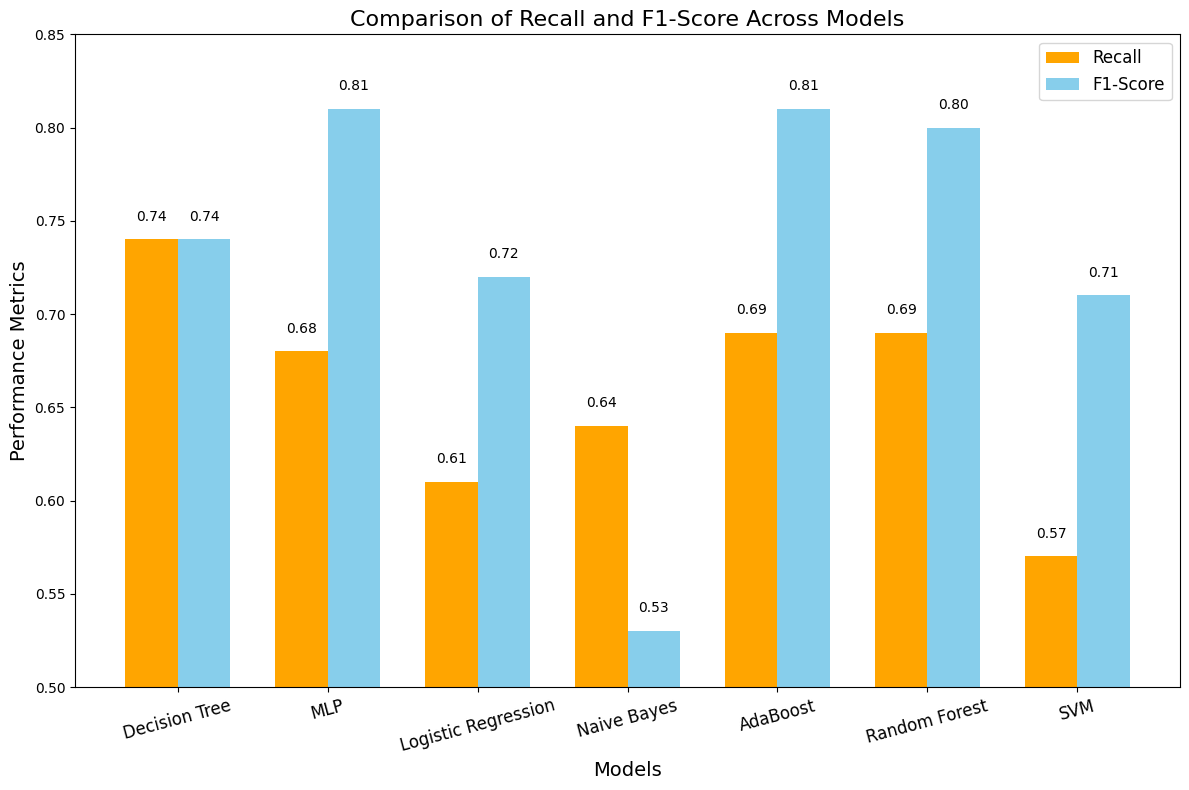

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# DataFrame with model performance metrics
model_data = {
    "Model": ["Decision Tree", "MLP", "Logistic Regression", "Naive Bayes", "AdaBoost", "Random Forest", "SVM"],
    "Recall": [0.74, 0.68, 0.61, 0.64, 0.69, 0.69, 0.57],
    "F1-Score": [0.74, 0.81, 0.72, 0.53, 0.81, 0.8, 0.71]
}

df = pd.DataFrame(model_data)

# Create the positions for the bars
x = np.arange(len(df["Model"]))  # Positions for groups
width = 0.35  # Width of the bars

# Plot Recall and F1-Score side-by-side
plt.figure(figsize=(12, 8))
plt.bar(x - width/2, df["Recall"], width, label='Recall', color='orange')
plt.bar(x + width/2, df["F1-Score"], width, label='F1-Score', color='skyblue')

# Add labels, title, and legend
plt.xlabel("Models", fontsize=14)
plt.ylabel("Performance Metrics", fontsize=14)
plt.title("Comparison of Recall and F1-Score Across Models", fontsize=16)
plt.xticks(x, df["Model"], rotation=15, fontsize=12)  # Add model names as x-axis labels
plt.ylim(0.5, 0.85)  # Adjust y-axis limits
plt.legend(fontsize=12)

# Add values above bars
for i, (recall, f1) in enumerate(zip(df["Recall"], df["F1-Score"])):
    plt.text(i - width/2, recall + 0.01, f"{recall:.2f}", ha='center', fontsize=10, color='black')
    plt.text(i + width/2, f1 + 0.01, f"{f1:.2f}", ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()
